![KINGS](kings_logo.png)

# <center>Sacramento Kings </center>
## <center>May 6, 2022</center>
## <center>Team Members:  Jie Guo,Christopher Chao, Gina Zeng,Cameron Swanson</center>

# Table of Contents

__I. [Define the Objective](#objective)__
<br>
__II. [Data Sources](#sources)__
<br>
__III. [Exploratory Data Analysis](#eda)__
<br>
__IV. [Analytic Techniques](#analytic)__
<br>
&nbsp;&nbsp;&nbsp;&nbsp;__i. [Emails and Events Analysis](#email)__
<br>
&nbsp;&nbsp;&nbsp;&nbsp;__ii. [Customer Segmentation - Geographic Analysis](#geo)__
<br>
&nbsp;&nbsp;&nbsp;&nbsp;__iii. [Customer Segmentation - Behavior-Based Analysis](#behave)__
<br>
&nbsp;&nbsp;&nbsp;&nbsp;__iv. [Market Basket Analysis](#market)__
<br>
__V. [Business Recommendations & Next Steps](#recs)__

<a name="objective"></a>
# I. Define the Objective

The __Sacramento Kings__ are a professional basketball team based in Sacramento, CA.  Originally based in Rochester, NY, the team relocated first to Cincinnati, and then Kansas City, before settling in Sacramento in 1985.  The team's home games are played out of the Golden 1 Center -- having moved from the now-defunct Sleep Train Arena in 2016 -- to a crowd of about 17,000 fans when at full capacity.

The Kings' business intelligence team has recently started receiving monthly data from __Fanatics__, an online retailer responsible for merchandise sales of major professional sports teams, including the NBA, NFL, MLB, and the Premier League.  Each dataset contains records of Fanatics customers that purchased any __Kings-affiliated merchandise__ during that month.  The team also has access to current and historical __ticket sales records__, as well as __email activity and event form submission records__.  With this data, our team has been tasked by the Kings to __analyze their customers and provide insights on their behavior__.  These insights will be used by the Kings to develop marketing campaigns that better target their customers, with the goal of increasing overall ticket and merchandise sales.

<a name="sources"></a>
# II. Data Sources

All datasets used in our analysis came __directly from the Sacramento Kings__, in the form of Excel workbooks and .csv files.  The most comprehensive of these datasets is the __Fanatics merchandise dataset__.  It contains __7250 line item purchases__, spread across __3446 customers__.  All orders in this dataset took place over the course of 2021.  There are __31 features__ in total, including __order ID, product name, product category and subcategory, unit price, quantity ordered, line total,__ and various demographic features, such as __shipping address, city and state.__

We have also been provided with three __email records datasets__, which have been split up by __activity type__ -- one dataset each is dedicated to __sent, open, and clicked emails.__  Features include the __subscriber ID (to link to other datasets), email ID, subject line, email name, and sent time.__  The datasets for clicked and opened emails also includes an __event date__ feature, which states the date and time at which the email was opened or clicked.

Our next dataset is the __ticket sales dataset__, containing records of tickets purchased from 2018 to March 2022, the time at which this dataset was received.  The dataset has __34,656 records__ of ticket purchases over this time period, with a total of __1145 customers__ responsible for these purchases.  Notable features include the __subscriber ID, event type, location of tickets (section, row, and seat numbers), total purchase price, event date, and season name (e.g. "Kings 2019-20").__

Our last dataset is the __event forms submission dataset__, containing records of customers that submitted event forms from December 2019 to March 2022.  This dataset contains __3388 records__ of submitted forms, across __820 unique subscribers.__  The only features included in this dataset are the __subscriber ID, form name, and date and time of submission.__

Finally, the customers in all data sources are limited to those who have a __subscriber account with Fanatics__.  Because of this, there are likely many customers that are not represented throughout this report -- for instance, customers who do not have a Fanatics account and consistently attend home games would be left out.  We recommend performing this analysis with these customers appended to this data (where applicable) to obtain more accurate findings.

<a name="eda"></a>
# III. Exploratory Data Analysis

To begin, we will conduct __exploratory data analysis__ to get some more basic insights on our data sources.  First, we will import all necessary libraries below.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.mlab as mlab  
import matplotlib.pyplot as plt 
from pandas import DataFrame, Series
from datetime import datetime
from plotly import graph_objects as go
import plotly.graph_objs as go2
from plotly import tools
import matplotlib.pyplot as plt
from plotly.offline import iplot
import plotly.express as px
import requests
from matplotlib import style
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from wordcloud import WordCloud
import collections
import math
from textblob import TextBlob as tb
import nltk
import datetime as dt
import jenkspy
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

## Merchandise Dataset

We'll begin with the merchandise dataset -- upon reading in our data, we first __drop unnamed columns__.  These are present due to the original formatting of the Excel worksheet.

In [2]:
merch_df = pd.read_csv("fanatics_2021_subscriber.csv")
merch_df = merch_df.loc[:, ~merch_df.columns.str.match("Unnamed:")]
merch_df.head()

OrderID  PartnerSite                PartnerSiteName      Subscriber Key  \
0  175302812         8551  Sacramento Kings Online Store  0031R00001v0pctQAA   
1  171785884         8551  Sacramento Kings Online Store  0031R00001v0pfTQAQ   
2  194914895         8551  Sacramento Kings Online Store  0031R00001v0wDOQAY   
3  197969348         8551  Sacramento Kings Online Store  0031R00001v1635QAA   
4  197969348         8551  Sacramento Kings Online Store  0031R00001v1635QAA   

   EmailOptIn   ClientId   OrderDate ProductCategory ProductSubCategory  \
0           1  249785879   2021/3/17             JER                YTH   
1           1  246732872   2021/1/17             TEE                LAD   
2           1  266849909  2021/11/23             SWT                MEN   
3           1  269612912   2021/12/6             EQU                GOL   
4           1  269612912   2021/12/6             SWT                MEN   

   ProductID  ... ExtendedPrice Order Discount Total Order Subtotal  \
0    4114498  ...       $74.99                $0.00         $74.99    
1    3948454  ...       $19.99                $0.00         $19.99    
2    4178635  ...       $30.00                $0.00         $30.00    
3    4036353  ...       $10.99                $0.00         $45.99    
4    4192414  ...       $35.00                $0.00         $45.99    

  OrderTaxableSubTotal OrderNonTaxableSubTotal OrderTaxTotal OrderTotal  \
0              $74.99                   $0.00         $6.51     $90.48    
1              $19.99                   $0.00         $2.43     $31.40    
2              $30.00                   $0.00         $2.48     $41.46    
3              $45.99                   $0.00         $3.48     $51.46    
4              $45.99                   $0.00         $3.48     $51.46    

  OrderShipTotal OrderTotalPaidByAccount  OrderTotalPaidByFancash  
0         $6.99                   $0.00                    $0.00   
1         $6.99                   $0.00                    $0.00   
2         $6.99                   $0.00                    $0.00   
3         $0.00                   $0.00                    $0.00   
4         $0.00                   $0.00                    $0.00   

[5 rows x 31 columns]

The above head printout shows the basic structure of our merchandise data.  We can also confirm we have __7250 line items__ and __31 features__ in total, and can see a list of the features present below.

In [3]:
merch_df.shape

(7249, 31)

In [4]:
merch_df.columns

Index(['OrderID', 'PartnerSite', 'PartnerSiteName', 'Subscriber Key',
       'EmailOptIn', 'ClientId', 'OrderDate', 'ProductCategory',
       'ProductSubCategory', 'ProductID', 'ProductName/Description',
       'ShipAddressCity', 'ShipAddressState', 'ShipAddressCountry',
       'ShipAddressZip', 'BillAddressCity', 'BillAddressState',
       'BillAddressCountry', 'BillAddressZip', 'QuantitySold', 'UnitPrice',
       'ExtendedPrice', 'Order Discount Total', 'Order Subtotal',
       'OrderTaxableSubTotal', 'OrderNonTaxableSubTotal', 'OrderTaxTotal',
       'OrderTotal', 'OrderShipTotal', 'OrderTotalPaidByAccount',
       'OrderTotalPaidByFancash'],
      dtype='object')

At this point we'll also read in a file that contains __all the IDs of our Fanatics subscribers__ to link this dataset to the others later on.  We'll merge it with our merchandise dataset first.

In [5]:
merch_sub = pd.read_csv("fanatics subscriber keys.csv")
# Rename SubscriberKey column for consistency with other datasets
merch_sub.rename(columns={'SubscriberKey':'Subscriber Key'}, inplace = True)
merch_sub.head()

Subscriber Key
0  0031R00001v0pctQAA
1  0031R00001v0pfTQAQ
2  0031R00001v0wDOQAY
3  0031R00001v1635QAA
4  0031R00001v16LtQAI

In [6]:
merch_df = merch_df.merge(merch_sub,on = 'Subscriber Key',how = 'inner')
merch_df.shape

(7248, 31)

We can see that two records have been removed after merging -- further inspection reveals that one record contained __no subscriber key__, while another record was completely null.  We can now confirm below that our dataset has __no missing values.__

In [7]:
print(merch_df.isnull().any())

OrderID                    False
PartnerSite                False
PartnerSiteName            False
Subscriber Key             False
EmailOptIn                 False
ClientId                   False
OrderDate                  False
ProductCategory            False
ProductSubCategory         False
ProductID                  False
ProductName/Description    False
ShipAddressCity            False
ShipAddressState           False
ShipAddressCountry         False
ShipAddressZip             False
BillAddressCity            False
BillAddressState           False
BillAddressCountry         False
BillAddressZip             False
QuantitySold               False
UnitPrice                  False
ExtendedPrice              False
Order Discount Total       False
Order Subtotal             False
OrderTaxableSubTotal       False
OrderNonTaxableSubTotal    False
OrderTaxTotal              False
OrderTotal                 False
OrderShipTotal             False
OrderTotalPaidByAccount    False
OrderTotal

Our next step is to verify that the __datatypes of each column are correct.__  We can printout each column's datatypes below.

In [8]:
merch_df.dtypes

OrderID                     int64
PartnerSite                 int64
PartnerSiteName            object
Subscriber Key             object
EmailOptIn                  int64
ClientId                    int64
OrderDate                  object
ProductCategory            object
ProductSubCategory         object
ProductID                   int64
ProductName/Description    object
ShipAddressCity            object
ShipAddressState           object
ShipAddressCountry         object
ShipAddressZip             object
BillAddressCity            object
BillAddressState           object
BillAddressCountry         object
BillAddressZip             object
QuantitySold                int64
UnitPrice                  object
ExtendedPrice              object
Order Discount Total       object
Order Subtotal             object
OrderTaxableSubTotal       object
OrderNonTaxableSubTotal    object
OrderTaxTotal              object
OrderTotal                 object
OrderShipTotal             object
OrderTotalPaid

Most of the datatypes look correct -- however, we note that the __price and totals columns are of type "object" (string), rather than "float".__  Also, we note the __"OrderDate" column is also of type "object" rather than a datetime.__  We'll correct these datatypes now, starting with the __price columns__.

In [9]:
price_columns = ["UnitPrice", "ExtendedPrice", "Order Discount Total", "Order Subtotal", "OrderTaxableSubTotal",
                "OrderNonTaxableSubTotal", "OrderTaxTotal", "OrderTotal", "OrderShipTotal", "OrderTotalPaidByAccount",
                "OrderTotalPaidByFancash"]

merch_df[price_columns] = merch_df[price_columns].apply(lambda x:x.str[1:].str.split(",").str.join("")).astype("float")

In [10]:
merch_df["OrderTotal"].head()

0    90.48
1    31.40
2    41.46
3    51.46
4    51.46
Name: OrderTotal, dtype: float64

The above head printout of the __OrderTotal__ feature column verifies that our conversion was successful.

Next, we'll do the same with the __OrderDate__ feature.

In [11]:
merch_df['OrderDate'] = pd.to_datetime(merch_df['OrderDate'])
merch_df['OrderDate']

0      2021-03-17
1      2021-01-17
2      2021-11-23
3      2021-12-06
4      2021-12-06
          ...    
7243   2021-12-08
7244   2021-11-27
7245   2021-11-27
7246   2021-11-27
7247   2021-05-05
Name: OrderDate, Length: 7248, dtype: datetime64[ns]

The above `head()` printout and below `info()` printout confirm that both of our datatype conversions were successful.

In [12]:
merch_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7248 entries, 0 to 7247
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   OrderID                  7248 non-null   int64         
 1   PartnerSite              7248 non-null   int64         
 2   PartnerSiteName          7248 non-null   object        
 3   Subscriber Key           7248 non-null   object        
 4   EmailOptIn               7248 non-null   int64         
 5   ClientId                 7248 non-null   int64         
 6   OrderDate                7248 non-null   datetime64[ns]
 7   ProductCategory          7248 non-null   object        
 8   ProductSubCategory       7248 non-null   object        
 9   ProductID                7248 non-null   int64         
 10  ProductName/Description  7248 non-null   object        
 11  ShipAddressCity          7248 non-null   object        
 12  ShipAddressState         7248 non-

With our data cleaning complete, we can now create visualizations to obtain some basic insights.

### Total Sales and Purchases Over Time (2021)

Our first visualization shows the trends of __total sales and items purchased monthly throughout 2021.__  Below is the code used to manipulate the dataframe prior to plotting.  During this manipulation, we use `drop_duplicates()` on the __OrderID__ column, because for orders with more than one line item, the order total would be displayed in both rows, effectively double-counting each order total.

In [13]:
unique_orders = merch_df.drop_duplicates(subset=["OrderID"])
per_month=unique_orders.resample('M', on='OrderDate').agg({'OrderTotal':'sum', "QuantitySold": "sum"})
permonth = pd.DataFrame({'Month':per_month.index, 'OrderTotal':per_month.OrderTotal, "QuantitySold": per_month.QuantitySold})
permonth = permonth.reset_index(drop='True')
permonth.Month=permonth.Month.astype(np.str)
permonth["Month"] = pd.Series(["January 2021", "February 2021", "March 2021", "April 2021", "May 2021", "June 2021", "July 2021",
                              "August 2021", "September 2021", "October 2021", "November 2021", "December 2021"])

We now plot the data below, in the form of a __line plot.__  We can see a slump in activity throughout the summer, with a __significant surge__ starting in the fall and peaking in November 2021.

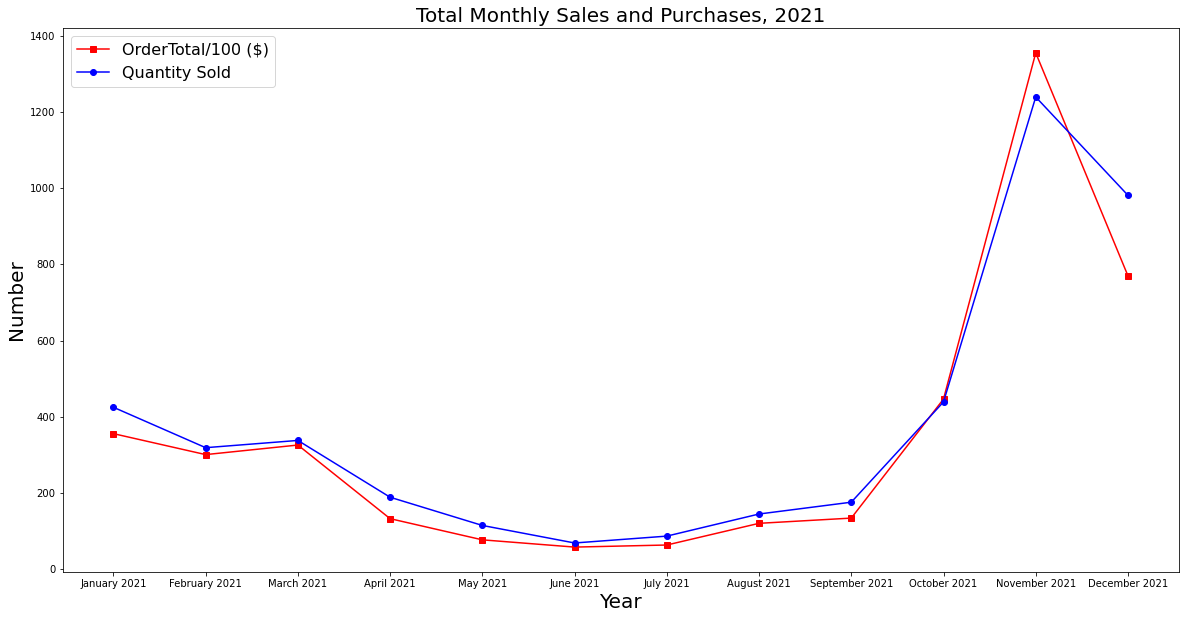

In [14]:
x = permonth['Month']
k1 = permonth['OrderTotal']/100
k2 = permonth['QuantitySold']
plt.plot(x,k1,'s-',color = 'r',label="OrderTotal/100 ($)")
plt.plot(x,k2,'o-',color = 'b',label="Quantity Sold")
plt.xlabel("Year", fontsize=20)
plt.ylabel("Number", fontsize=20)
plt.title('Total Monthly Sales and Purchases, 2021', fontsize=20)
plt.legend(loc = "best", prop={"size":16})
plt.gcf().set_size_inches(20, 10)
plt.show()

### Top 10 Individual Products by Total Purchases

The next visualization for this dataset shows the __total purchases, broken down by individual product__.  Below, we create the necessary dataset for plotting.

In [15]:
Productid=merch_df.groupby('ProductID')
the_sales_products=Productid['QuantitySold'].agg('sum')
the_sales_products=the_sales_products.sort_values(ascending=[False])
the_sales_products = the_sales_products.to_frame()
the_sales_products = pd.DataFrame({'ProductID':the_sales_products.index, 'QuantitySold':the_sales_products.QuantitySold})
the_sales_products = the_sales_products.reset_index(drop='True')
the_sales_products.ProductID=the_sales_products.ProductID.astype(np.str)
the_sales_products = the_sales_products.sort_values(by=['QuantitySold'],ascending=[False])
the_sales_products = the_sales_products[0:10]
product_id_name = merch_df[["ProductID", "ProductName/Description"]]
the_sales_products["ProductID"] = the_sales_products["ProductID"].astype("float")
the_sales_products = the_sales_products.merge(product_id_name, how="left", left_on="ProductID", right_on="ProductID")
the_sales_products = the_sales_products.drop_duplicates(subset=["ProductID"])

Next, we visualize our data below, using a __bar chart__.

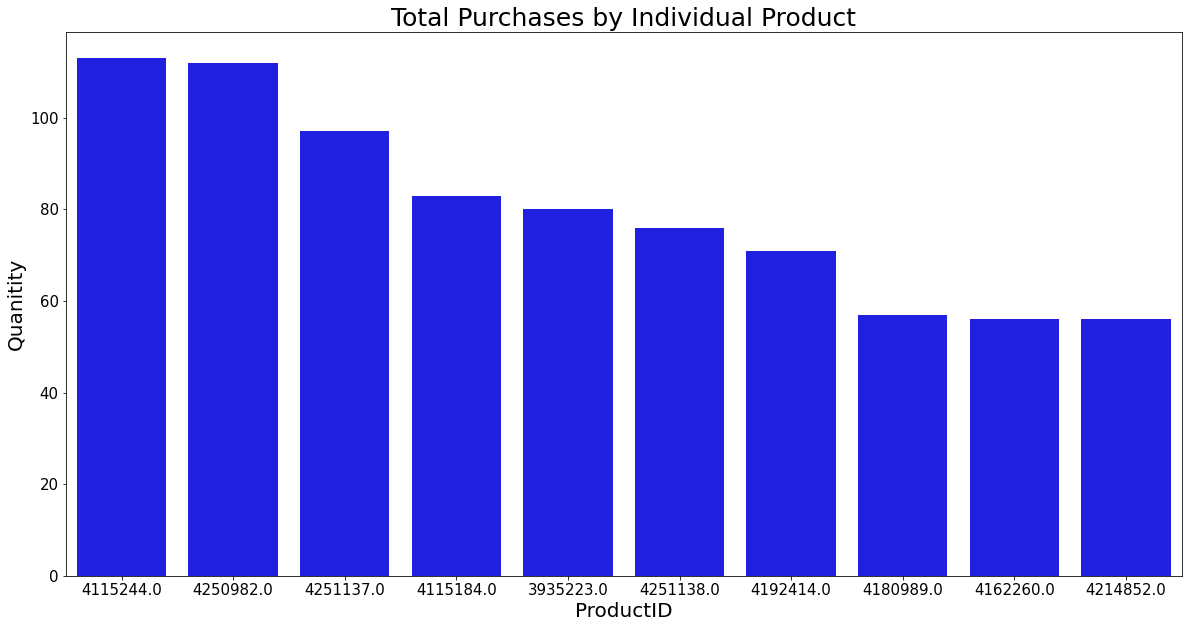

In [16]:
productid = the_sales_products.ProductID

OrderTotal_productid = the_sales_products['QuantitySold']

sns.barplot(x = "ProductID", y = "QuantitySold", data=the_sales_products, 
            order=the_sales_products.sort_values(["QuantitySold"], ascending=False)["ProductID"],
           color = "blue")
plt.ylabel('Quanitity', fontsize=20)
plt.xlabel('ProductID', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Total Purchases by Individual Product', fontsize=25)
plt.gcf().set_size_inches(20, 10)

plt.show()

The below printout displays the top 10 products in order.  Comparing to the above chart, we observe that most of the top 10 products are __tee shirts, jerseys, and hoodies__ -- the exception to this is __face masks__, the 5th most popular product.

In [17]:
for i in the_sales_products["ProductName/Description"]:
    print(i)

Men's New Era Black Sacramento Kings 2020/21 City Edition T-Shirt
Men's Nike Black Sacramento Kings 2021/22 Swingman Custom Jersey - City Edition
Men's Nike De'Aaron Fox Black Sacramento Kings 2021/22 Swingman Jersey - City Edition
Men's New Era Black Sacramento Kings 2020/21 City Edition Pullover Hoodie
Adult Fanatics Branded Sacramento Kings Team Logo Face Covering 3-Pack
Men's Nike Tyrese Haliburton Black Sacramento Kings 2021/22 Swingman Jersey - City Edition
Men's Fanatics Branded Heathered Charcoal Sacramento Kings Instant Replay Colorblocked Pullover Hoodie
Men's Nike Black Sacramento Kings 2020/21 City Edition Story Club Pullover Hoodie
Men's Nike Black Sacramento Kings 2021/22 On-Court Practice Legend Performance Long Sleeve T-Shirt
Men's Fanatics Branded Tyrese Haliburton Purple Sacramento Kings 2020/21 Fast Break Replica Jersey - Icon Edition


## Tickets Dataset

Next, we'll move on to the __ticket sales dataset.__ Like before, we'll first read in the relevant .csv file, and get an idea of its structure with `head()` and `shape` printouts.

In [18]:
ticket_pur = pd.read_csv('Fanatics_Ticket Purchases Since 2018-19.csv')
ticket_pur.head()

ID PLANEVENTNAME EVENTNAME SECTIONNAME ROWNAME  FIRSTSEAT  \
0  0033600000SfmcoAAB         19KFL  ESKB1112         104       B          7   
1  0033600000SfQ8lAAF         19KFL  ESKB1130         208       B          3   
2  0033600000SfRIiAAN         19KFL  ESKB0317         119       T          3   
3  0033600000SfeJEAAZ         19KFL  ESKB0303         112       R         13   
4  0033600001XCrK1AAL         19KFL  ESKB0301         213       B          5   

   NUMBEROFSEATS  BLOCKPURCHASEPRICE PRICECODE   EVENTDATE  \
0              3               321.0      G8K2  2019-11-12   
1              1                47.0      N2K1  2019-11-30   
2              2               178.0      DRUI  2020-03-17   
3              2                74.0      JAK1  2020-03-03   
4              1                30.0      O2K1  2020-03-01   

                 SEASONNAME  
0  2019-20 KINGS NEW SEASON  
1  2019-20 KINGS NEW SEASON  
2  2019-20 KINGS NEW SEASON  
3  2019-20 KINGS NEW SEASON  
4  2019-20 KINGS NEW SEASON

In [19]:
ticket_pur.shape

(34656, 11)

Next, we check for __missing values.__

In [20]:
ticket_pur.isnull().sum()

ID                       0
PLANEVENTNAME         6662
EVENTNAME                0
SECTIONNAME              0
ROWNAME                  0
FIRSTSEAT                0
NUMBEROFSEATS            0
BLOCKPURCHASEPRICE       0
PRICECODE                0
EVENTDATE                0
SEASONNAME               0
dtype: int64

We notice that only the __"PLANEVENTNAME" column__ has missing values.  However, Colin noted to us that a null value in this column indicated that the purchase was related to __a single game, rather than season tickets.__  Thus, to correct these missing values, we convert this column into a column of integers, with a value of 1 for __season ticket purchases__, and a value of 0 for __single ticket purchases.__

In [21]:
ticket_pur['PLANEVENTNAME'] = ticket_pur['PLANEVENTNAME'].fillna(0)
ticket_pur.loc[ticket_pur["PLANEVENTNAME"] != 0, "PLANEVENTNAME"] = 1
ticket_pur["PLANEVENTNAME"].unique()

array([1, 0], dtype=object)

We confirm our conversion was successful, and the below printout verifies the missing values are filled in.

In [22]:
ticket_pur.isnull().sum()

ID                    0
PLANEVENTNAME         0
EVENTNAME             0
SECTIONNAME           0
ROWNAME               0
FIRSTSEAT             0
NUMBEROFSEATS         0
BLOCKPURCHASEPRICE    0
PRICECODE             0
EVENTDATE             0
SEASONNAME            0
dtype: int64

Finally, we convert the __EVENTDATE__ column to a datetime to work with our next visualization.

In [23]:
ticket_pur['EVENTDATE'] = pd.to_datetime(ticket_pur['EVENTDATE']).dt.date

### Tickets Purchased Over Time

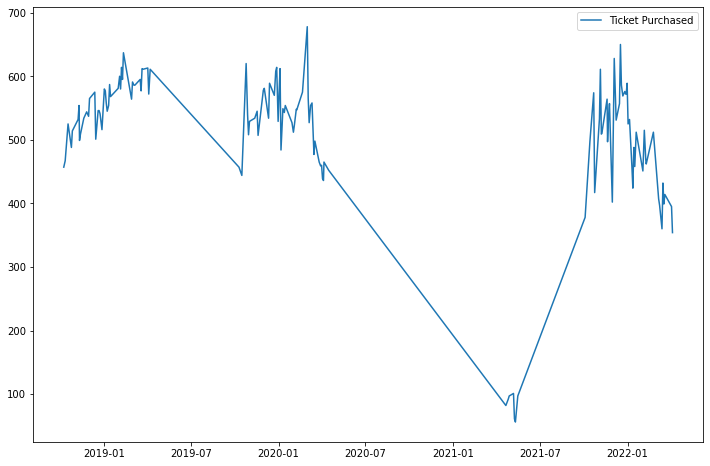

In [24]:
ticket_time = ticket_pur.groupby('EVENTDATE')['NUMBEROFSEATS'].sum()
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(8)
plt.plot(ticket_time.index, ticket_time.values, label = "Ticket Purchased")
plt.legend()
plt.show()

We can see that the most tickets for a single game were purchased around __March 2020__ -- however, that value is only around __700 tickets,__ which seems quite unrealistic.  Given the Golden 1 Center has a __capacity of about 17,000__, it's clear that there are customers missing from this dataset.  Since we know the data is only limited to customers that have Fanatics accounts, there are customers that are unaccounted for, such as those who attend games but don't buy merchandise; this must be kept in mind as our analysis continues.

## Emails and Forms Datasets

Finally, we'll move onto the __emails and form submission datasets__.  First, we'll take a look at the email datasets below.

In [25]:
email_clicks = pd.read_csv('fanatics_emails_clicks.csv')
email_open = pd.read_csv('fanatics_emails_open.csv')
email_sent = pd.read_csv('fanatics_emails_sent.csv')

In [26]:
email_clicks.head()

SUBSCRIBERKEY  SENDID EVENTTYPE                      SUBJECT  \
0  0033600001VEjSEAA1  109730     Click  ????Less than a month away!   
1  0033600000Sf88yAAB  109730     Click  ????Less than a month away!   
2  0033600000SgE43AAF  109730     Click  ????Less than a month away!   
3  0033600000SgFQBAA3  109730     Click  ????Less than a month away!   
4  0033600001VEjSEAA1  109730     Click  ????Less than a month away!   

                                EMAILNAME                       SENTTIME  \
0  060719 KI. Kings Insider Newsletter #1  2019-06-07 16:16:00.000 -0400   
1  060719 KI. Kings Insider Newsletter #1  2019-06-07 16:16:00.000 -0400   
2  060719 KI. Kings Insider Newsletter #1  2019-06-07 16:16:00.000 -0400   
3  060719 KI. Kings Insider Newsletter #1  2019-06-07 16:16:00.000 -0400   
4  060719 KI. Kings Insider Newsletter #1  2019-06-07 16:16:00.000 -0400   

                       EVENTDATE  
0  2019-06-07 18:50:19.000 -0400  
1  2019-06-10 00:02:47.000 -0400  
2  2019-06-09 09:14:25.000 -0400  
3  2019-06-07 20:57:48.000 -0400  
4  2019-06-07 18:48:46.000 -0400

In [27]:
email_clicks.shape

(24928, 7)

In [28]:
email_open.shape

(178472, 7)

In [29]:
email_sent.shape

(227361, 6)

Because all three datasets have similar structure, we can observe it using just one `head()` printout.  We can also see that the "sent" dataset has the greatest number of entries (__227,000__), while the "clicked" dataset has the least (__25,000__).  This is reasonable, as all emails must be sent, but not all are necessarily opened or clicked.  

We can then confirm below that all three datasets have __no missing values__.

In [30]:
email_sent.isnull().sum()

SUBSCRIBERKEY    0
SENDID           0
EVENTTYPE        0
SUBJECT          0
EMAILNAME        0
SENTTIME         0
dtype: int64

In [31]:
email_open.isnull().sum()

SUBSCRIBERKEY    0
SENDID           0
EVENTTYPE        0
SUBJECT          0
EMAILNAME        0
SENTTIME         0
EVENTDATE        0
dtype: int64

In [32]:
email_clicks.isnull().sum()

SUBSCRIBERKEY    0
SENDID           0
EVENTTYPE        0
SUBJECT          0
EMAILNAME        0
SENTTIME         0
EVENTDATE        0
dtype: int64

### Sent vs. Opened vs. Clicked Emails

Next we can visualize the proportion of __sent vs. opened vs. clicked emails.__  This will give us an idea of the response rate of the Kings' email subscribers.  We can see that of all the emails sent, about __78% were opened__, and about __11% were clicked,__ thereby indicating about an __11% response rate.__

In [33]:
fig = go2.Figure(go2.Funnel(
    y = ["Email Sent", "Email Opened", "Email Clicked"],
    x = [email_sent.SUBSCRIBERKEY.count(),email_open.SUBSCRIBERKEY.count(),email_clicks.SUBSCRIBERKEY.count()],
    textposition = "inside",
    textinfo = "value+percent initial",
    opacity = 0.65, marker = {"color": ["deepskyblue", "lightsalmon", "tan"],
    "line": {"width": [4, 2, 2, 3, 1, 1], "color": ["wheat", "wheat", "blue"]}},
    connector = {"line": {"color": "royalblue", "dash": "dot", "width": 3}})
    )

fig.show("notebook")

<a name="analytic"></a>
# IV. Analytic Techniques

With our cleaning and exploratory analysis complete, our next step is to perform a more detailed analysis with our data, and combine datasets together to produce more profound insights.  We'll begin with a closer look at our __emails and forms data__, and then perfom __customer segmentation__ by way of __geographic analysis__ and __behavior-based analysis__.  Lastly, we'll finish with __market basket analysis,__ which aims to predict items that are likely to be purchased together.

<a name="email"></a>
## i. Emails and Events Analysis

We'll begin our deeper analysis of emails and form submissions by visualizing __email activity over time.__ Below, we will concatenate our email datasets together, and manipulate the result into the correct format for plotting.  We'll also need to obtain the __unique email events__ across the dataset -- in other words, if an email is _clicked,_ we need to delete the events during which that same email was _sent_ and _opened_.

In [34]:
# Concatenate email datasets
email_logs = pd.concat([email_clicks, email_open, email_sent])
email_logs['SENTTIME'] = pd.to_datetime(email_logs['SENTTIME'], errors='coerce', utc=True)
email_logs['EVENTDATE'] = pd.to_datetime(email_logs['EVENTDATE'], errors='coerce', utc=True)
email_logs.head()

SUBSCRIBERKEY  SENDID EVENTTYPE                      SUBJECT  \
0  0033600001VEjSEAA1  109730     Click  ????Less than a month away!   
1  0033600000Sf88yAAB  109730     Click  ????Less than a month away!   
2  0033600000SgE43AAF  109730     Click  ????Less than a month away!   
3  0033600000SgFQBAA3  109730     Click  ????Less than a month away!   
4  0033600001VEjSEAA1  109730     Click  ????Less than a month away!   

                                EMAILNAME                  SENTTIME  \
0  060719 KI. Kings Insider Newsletter #1 2019-06-07 20:16:00+00:00   
1  060719 KI. Kings Insider Newsletter #1 2019-06-07 20:16:00+00:00   
2  060719 KI. Kings Insider Newsletter #1 2019-06-07 20:16:00+00:00   
3  060719 KI. Kings Insider Newsletter #1 2019-06-07 20:16:00+00:00   
4  060719 KI. Kings Insider Newsletter #1 2019-06-07 20:16:00+00:00   

                  EVENTDATE  
0 2019-06-07 22:50:19+00:00  
1 2019-06-10 04:02:47+00:00  
2 2019-06-09 13:14:25+00:00  
3 2019-06-08 00:57:48+00:00  
4 2019-06-07 22:48:46+00:00

In [35]:
# Obtain unique email events, group by month and year
unique_email_events = email_logs.drop_duplicates(subset = ['SUBSCRIBERKEY', 'SENDID'], keep = 'first').reset_index(drop = True)
unique_email_events_count = unique_email_events["EVENTTYPE"].groupby([unique_email_events["SENTTIME"].dt.year, unique_email_events["SENTTIME"].dt.month, unique_email_events["EVENTTYPE"]]).count()
unique_email_events_count = unique_email_events_count.to_frame()
unique_email_events_count.index.names = ['SENTYEAR','SENTMONTH','EVENTTYPE']
unique_email_events_count = unique_email_events_count.rename(columns={"EVENTTYPE": "EVENTCOUNT"})
unique_email_events_count = unique_email_events_count.reset_index()
unique_email_events_count = pd.pivot_table(unique_email_events_count, index=['SENTYEAR','SENTMONTH'], columns='EVENTTYPE', values='EVENTCOUNT')
unique_email_events_count.head()

EVENTTYPE           Click  Open  Sent
SENTYEAR SENTMONTH                   
2019     6             66   319  1139
         7            148   384  1340
         8            526   852  2089
         9            294  1398  3594
         10           480  2504  5424

<AxesSubplot:title={'center':'Email Actvity by Month, 2019-2022'}, xlabel='SENTYEAR,SENTMONTH'>

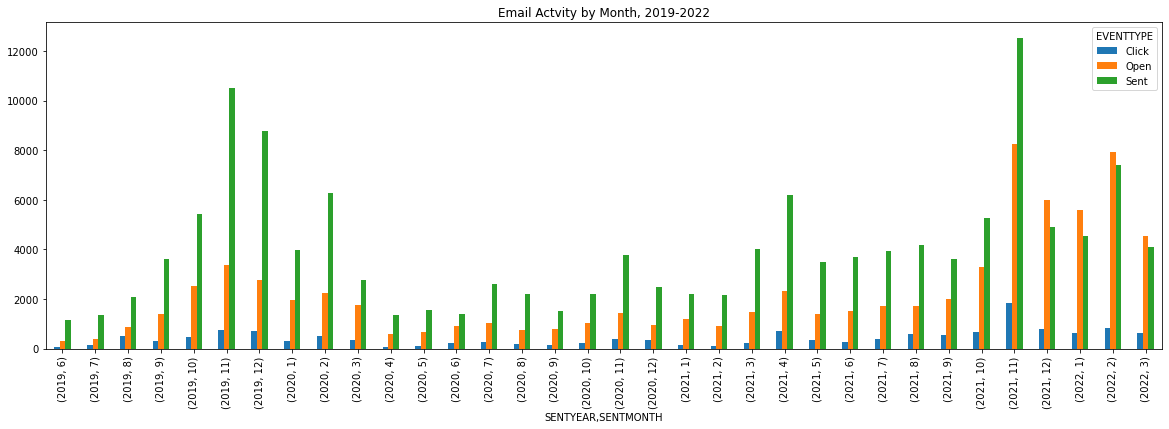

In [36]:
unique_email_events_count.plot.bar(figsize=(20, 6), title="Email Actvity by Month, 2019-2022")

As seen in the bar chart above, the majority of email activity is around the months of basketball season, between __October and April__, with the peaks being __November__ of each year. __2020 had a large dip__ in emails sent, opened, and clicked, which can be easily explained due to the __pandemic and stay-at-home orders.__ This would also explain why the __open rate increased greatly__ the following year in __November 2021__; most subscribers had missed a year of basketball and were eager to start the new season, so they tried to get as much information as possible, including emails.

We'll also view this data differently using a __stacked bar chart.__

<AxesSubplot:title={'center':'Proportion of Email Actvity by Month, 2019-2022'}, xlabel='SENTYEAR,SENTMONTH'>

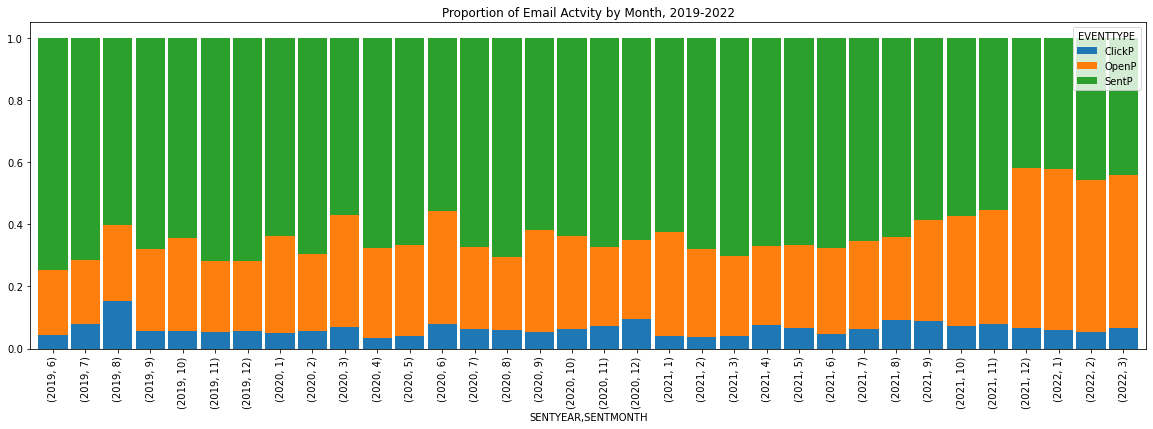

In [37]:
unique_email_events_count['Total'] = unique_email_events_count[['Click','Open','Sent']].sum(axis = 1)
unique_email_events_count['ClickP'] = unique_email_events_count['Click']/unique_email_events_count['Total']
unique_email_events_count['OpenP'] = unique_email_events_count['Open']/unique_email_events_count['Total']
unique_email_events_count['SentP'] = unique_email_events_count['Sent']/unique_email_events_count['Total']

unique_email_events_count[['ClickP','OpenP','SentP']].plot.bar(figsize=(20, 6), stacked=True, width=0.9, title="Proportion of Email Actvity by Month, 2019-2022")

With this new view, we can more clearly see the __rise in open rate__ at the start of the __2021-22 season__ in November.  However, we can also see an interesting __spike in click rate August 2019__.  It's possible that there was a specific game or other related event that generated a buzz within the community, resulting in the relatively high click rate on emails.

Next, we will examine email __subject lines__ to see if there are any buzzwords or specific phrases that may influence a subscriber's decision to click.  We'll accomplish this using __word clouds.__

In [38]:
# Split unique events by type
unique_clicks = unique_email_events[unique_email_events['EVENTTYPE'] == 'Click']['SUBJECT'].unique()
unique_opens = unique_email_events[unique_email_events['EVENTTYPE'] == 'Open']['SUBJECT'].unique()
unique_sents = unique_email_events[unique_email_events['EVENTTYPE'] == 'Sent']['SUBJECT'].unique()

# Obtain a corpus of subject lines for each event type, removing stop words and variable terms
click_words = " ".join(" ".join(unique_clicks).split('-')).replace('%%=v(@subject)=%%','').replace('%%FirstName%%', '').replace('%%Time%%', '').replace('?', '').replace('%%=v(@subjectline)=%%', '').replace('%%First Name%%', '').lower()
open_words = " ".join(" ".join(unique_opens).split('-')).replace('%%=v(@subject)=%%','').replace('%%FirstName%%', '').replace('%%Time%%', '').replace('?', '').replace('%%=v(@subjectline)=%%', '').replace('%%First Name%%', '').lower()
sent_words = " ".join(" ".join(unique_sents).split('-')).replace('%%=v(@subject)=%%','').replace('%%FirstName%%', '').replace('%%Time%%', '').replace('?', '').replace('%%=v(@subjectline)=%%', '').replace('%%First Name%%', '').lower()

# Generate word clouds
word_cloud_click = WordCloud(collocations = False, background_color = 'white', width=800, height=600).generate(click_words)
word_cloud_open = WordCloud(collocations = False, background_color = 'white', width=800, height=600).generate(open_words)
word_cloud_sent = WordCloud(collocations = False, background_color = 'white', width=800, height=600).generate(sent_words)

### Clicked Emails

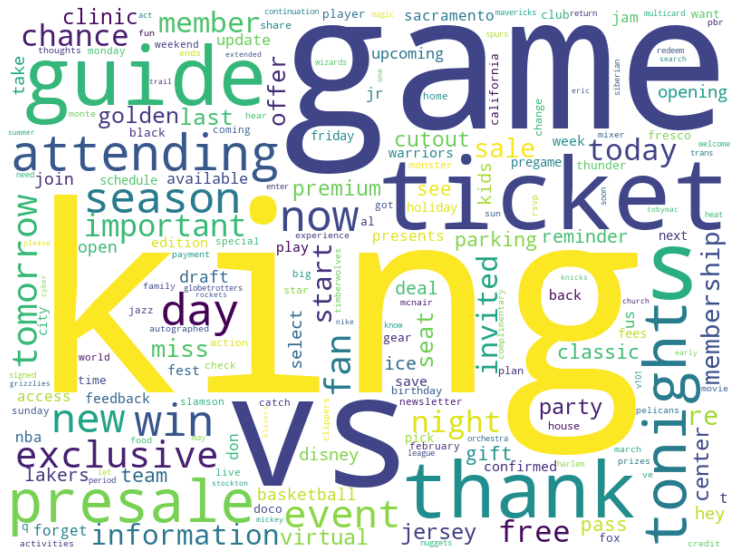

In [39]:
plt.figure(figsize=(20,10))
plt.imshow(word_cloud_click, interpolation='bilinear')
plt.axis("off")
plt.show()

### Opened Emails

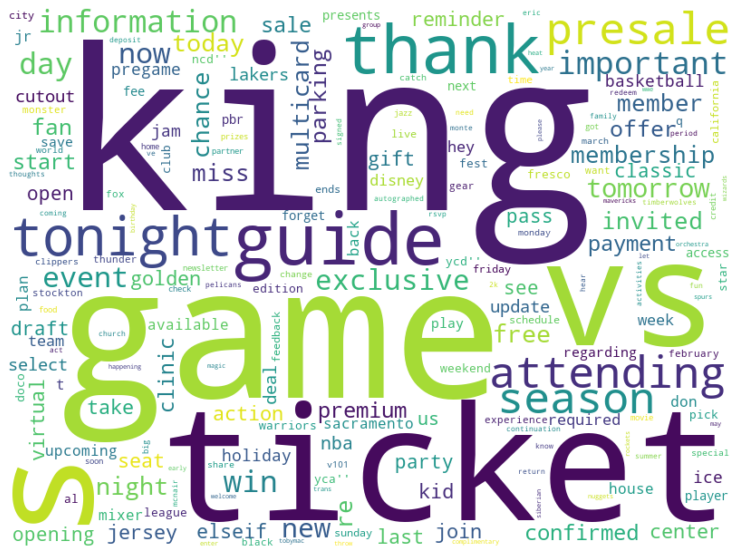

In [40]:
plt.figure(figsize=(20,10))
plt.imshow(word_cloud_open, interpolation='bilinear')
plt.axis("off")
plt.show()

### Sent Emails

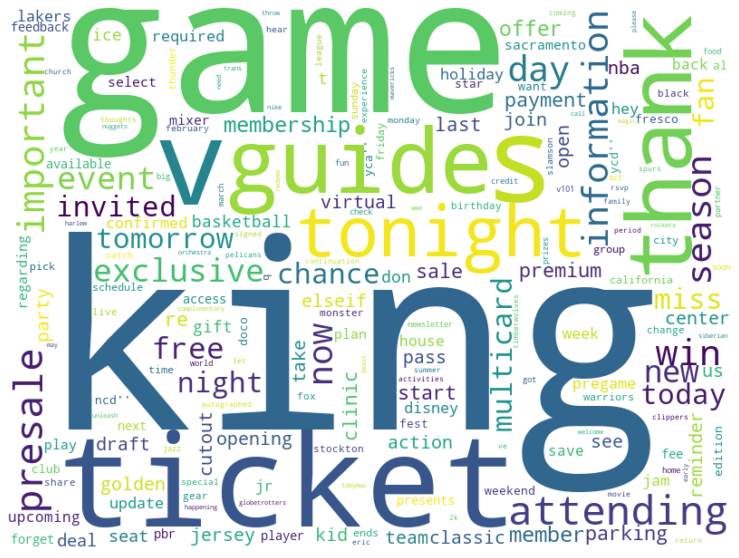

In [41]:
plt.figure(figsize=(20,10))
plt.imshow(word_cloud_sent, interpolation='bilinear')
plt.axis("off")
plt.show()

From a quick glance, the words __“king”, “game”, “vs”, “ticket”, and “thank”__ are the main words used across all three event types. However, it __does not appear that there is any difference__ in wordage for each event type. For a deeper look, these top five words will be removed, and we'll generate another set of word clouds to see if there are any differences.

In [42]:
# Recereate corpus for each event type, remove top 5 words, and re-generate word clouds
click_words = " ".join(" ".join(unique_clicks).split('-')).lower().replace('%%=v(@subject)=%%','').replace('%%FirstName%%', '').replace('%%Time%%', '').replace('?', '').replace('%%=v(@subjectline)=%%', '').replace('%%First Name%%', '').replace("king", '').replace("game", "").replace("ticket", "").replace("guide", "").replace("thank", "").replace("v ", "").replace("s ", "")
open_words = " ".join(" ".join(unique_opens).split('-')).lower().replace('%%=v(@subject)=%%','').replace('%%FirstName%%', '').replace('%%Time%%', '').replace('?', '').replace('%%=v(@subjectline)=%%', '').replace('%%First Name%%', '').replace("king", '').replace("game", "").replace("ticket", "").replace("guide", "").replace("thank", "").replace("v ", "").replace("s ", "")
sent_words = " ".join(" ".join(unique_sents).split('-')).lower().replace('%%=v(@subject)=%%','').replace('%%FirstName%%', '').replace('%%Time%%', '').replace('?', '').replace('%%=v(@subjectline)=%%', '').replace('%%First Name%%', '').replace("king", '').replace("game", "").replace("ticket", "").replace("guide", "").replace("thank", "").replace("v ", "").replace("s ", "")
word_cloud_click = WordCloud(collocations = False, background_color = 'white', width=800, height=600).generate(click_words)
word_cloud_open = WordCloud(collocations = False, background_color = 'white', width=800, height=600).generate(open_words)
word_cloud_sent = WordCloud(collocations = False, background_color = 'white', width=800, height=600).generate(sent_words)

### Clicked Emails

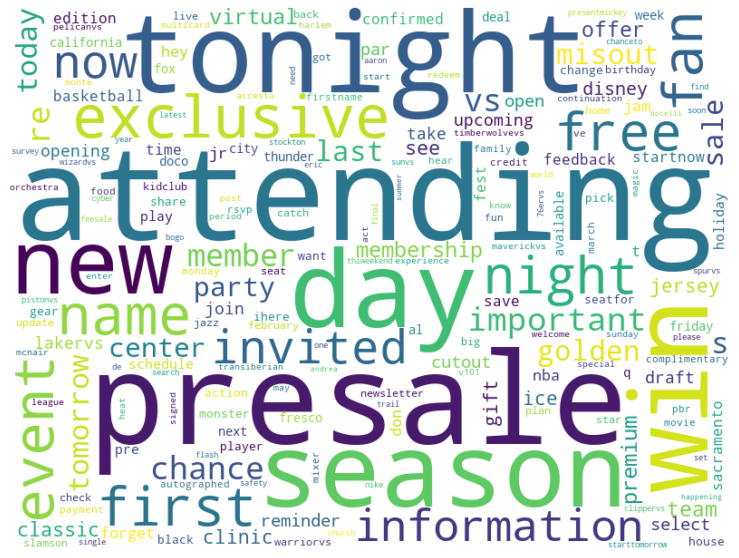

In [43]:
plt.figure(figsize=(20,10))
plt.imshow(word_cloud_click, interpolation='bilinear')
plt.axis("off")
plt.show()

### Opened Emails

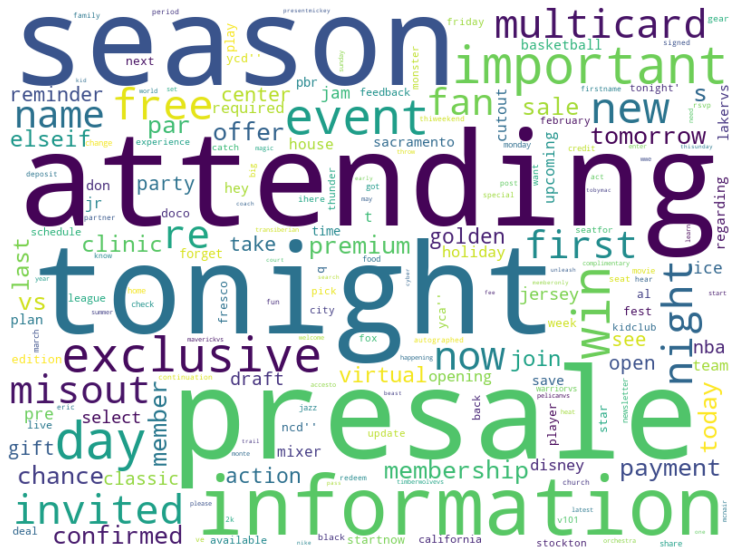

In [44]:
plt.figure(figsize=(20,10))
plt.imshow(word_cloud_open, interpolation='bilinear')
plt.axis("off")
plt.show()

### Sent Emails

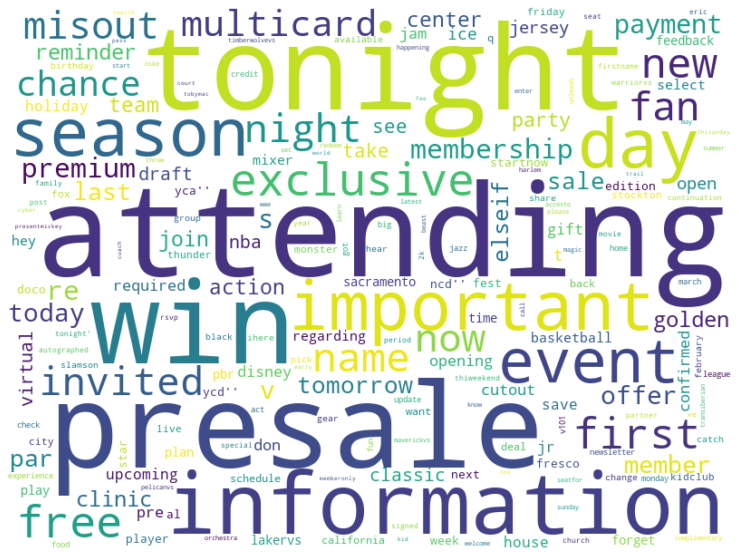

In [45]:
plt.figure(figsize=(20,10))
plt.imshow(word_cloud_sent, interpolation='bilinear')
plt.axis("off")
plt.show()

In this new set of word clouds, the main words are "attending", "season", "presale", and "tonight" across all event types. However, interestingly, both “click” and “sent” clouds have __more instances of “win”__ compared to “open”, while “open” has a __higher instance of “information”__ compared to the other two.

For a different look at this data, we will perform __TF-IDF analysis__ on the email subject lines (__T__erm __F__requency, __I__nverse __D__ocument __F__requency).  In this analysis, it is assumed that words that are important to one email type are likely to appear often in that type, and less often in other types. The TF-IDF scores for the top three words in each event type is shown below.

In [46]:
def tf(word, blob):
    return blob.words.count(word) / len(blob.words)

def n_containing(word, bloblist):
    return sum(1 for blob in bloblist if word in blob.words)

def idf(word, bloblist):
    return math.log(len(bloblist) / (1 + n_containing(word, bloblist)))

def tfidf(word, blob, bloblist):
    return tf(word, blob) * idf(word, bloblist)

bloblist = [tb(click_words), tb(open_words), tb(sent_words)]
doclist = ['Click', 'Open', 'Sent']
for i, blob in enumerate(bloblist):
    print(f"Top words in document {doclist[i]}")
    scores = {word: tfidf(word, blob, bloblist) for word in blob.words}
    sorted_words = sorted(scores.items(), key=lambda x: x[1], reverse=True)
    for word, score in sorted_words[:3]:
        print(f"\tWord: {word}, TF-IDF: {round(score, 5)}")

Top words in document Click
	Word: wine, TF-IDF: 0.00013
	Word: playoffpower, TF-IDF: 7e-05
	Word: foldhall, TF-IDF: 7e-05
Top words in document Open
	Word: boypar, TF-IDF: 5e-05
	Word: foldyou, TF-IDF: 5e-05
	Word: iconfirmed, TF-IDF: 5e-05
Top words in document Sent
	Word: selection, TF-IDF: 0.00016
	Word: appointment, TF-IDF: 0.00016
	Word: partnership, TF-IDF: 0.0001


As seen here, each tf-idf score is __very small__, meaning that these words are not that important or __do not tie closely to the document group__ itself. Because of these results, it can be concluded that there are __no obvious “buzzwords”__ that cause users to click and open an email.  Despite this, we believe it will be helpful to __tag each email into categories__ such as: “receipt”, “thank_you”, “informative”, and “promotion”. With this extra information, it will be possible to see the __types of emails__ the subscriber is interacting with, providing a new angle for analysis. Furthermore, since none of the emails contained information about merchandise, __we recommend to advertise merchandise and merchandise sales through email__ and record customer interaction.


Next, we'll analyze the __forms dataset__ to get a different angle of subscriber behavior.  

In [47]:
forms_df = pd.read_csv("fanatics_forms_submitted.csv")
forms_df.head()

SUBSCRIBERKEY                     CREATEDATE        FORMNAME
0  0033600001XCrK1AAL  2019-12-16 15:07:28.127 -0500  Q&A Event 1226
1  0033600000Sfb5JAAR  2019-12-17 14:00:55.283 -0500  STM Mixer 1223
2  0033600000SfZF2AAN  2019-12-18 15:30:35.353 -0500  STM Party 0111
3  0033600000SgCPQAA3  2019-12-18 16:45:18.490 -0500  Q&A Event 0102
4  0033600000SgPrSAAV  2019-12-18 19:46:15.090 -0500  Q&A Event 0102

Colin informed the team that __sweepstakes events__ might be a place to look for patterns, as they generally tend to garner high amounts of activity.  Thus, our next step is to separate the form records by __sweepstakes vs. non-sweepstakes__, and __visualize submission activity__ over time for both types.  We note that according to Colin, sweepstakes events tend to contain the phrases __"Sweeps" or "ETW"__ in their names.

In [48]:
forms_df['CREATEDATE'] = pd.to_datetime(forms_df['CREATEDATE'], errors='coerce', utc=True)
sweeps_mask = forms_df["FORMNAME"].str.contains("Sweeps")
etw_mask = forms_df["FORMNAME"].str.contains("ETW")
sweeps = forms_df[sweeps_mask | etw_mask]
non_sweeps = forms_df[~sweeps_mask & ~etw_mask]

sweeps_count = sweeps["CREATEDATE"].groupby([sweeps["CREATEDATE"].dt.year, sweeps["CREATEDATE"].dt.month]).count()
non_sweeps_count = non_sweeps["CREATEDATE"].groupby([non_sweeps["CREATEDATE"].dt.year, non_sweeps["CREATEDATE"].dt.month]).count()
sweeps_count.index.names = ['YEAR','MONTH']
non_sweeps_count.index.names = ['YEAR','MONTH']
sweeps_count = sweeps_count.to_frame().rename(columns={"CREATEDATE": "Sweeps"})
non_sweeps_count = non_sweeps_count.to_frame().rename(columns={"CREATEDATE": "Non Sweeps"})

merged_forms = pd.merge(non_sweeps_count, sweeps_count, on=['YEAR','MONTH'], how='outer').sort_index()
merged_forms.tail()

Non Sweeps  Sweeps
YEAR MONTH                    
2021 11          433.0   465.0
     12           12.0   209.0
2022 1             NaN   459.0
     2            20.0   866.0
     3            83.0   243.0

<AxesSubplot:title={'center':'Form Submission Activity -- Sweepstakes vs. Non-Sweepstakes'}, xlabel='YEAR,MONTH'>

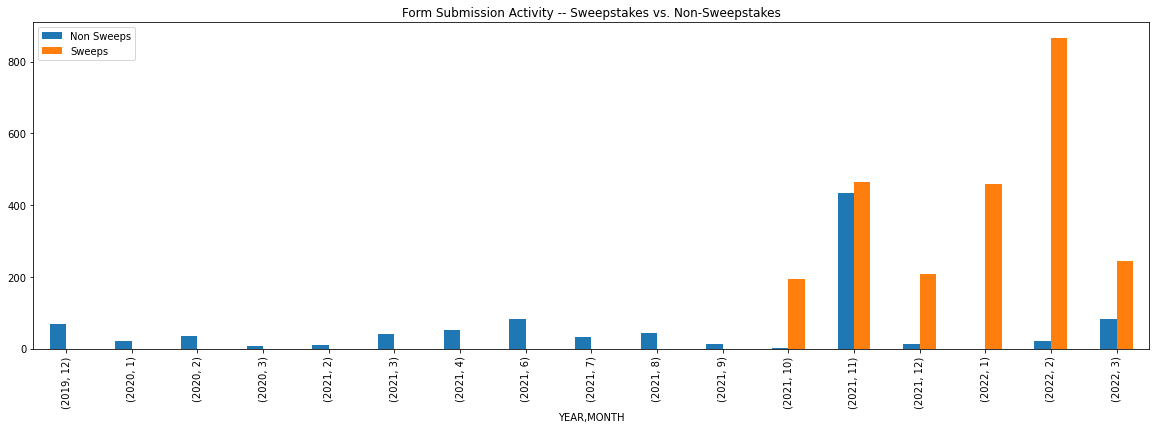

In [49]:
merged_forms.plot.bar(figsize=(20, 6), title="Form Submission Activity -- Sweepstakes vs. Non-Sweepstakes")

In the above bar chart, most forms were submitted starting __October 2021,__ most likely due to the pandemic affecting the year and basketball season before. Additionally, it appears that sweepstakes type forms were __introduced at the same time,__ with much greater participation compared to non-sweepstakes, and with an especially notable spike in activity in __February 2022.__

Next, we will create another bar chart showing the __top forms__ with the __most submissions__.  Once again, we note that most of these forms are for __sweepstakes events__, judging by the presence of "Sweeps" and "ETW".

In [ ]:
forms_df.groupby(forms_df["FORMNAME"]).count().sort_values(by='SUBSCRIBERKEY', ascending = False)['CREATEDATE'].head(10).plot(kind='bar', title="Top 10 Forms by Total Submissions")

<AxesSubplot:title={'center':'Top 10 Forms by Total Submissions'}, xlabel='FORMNAME'>

Next, we will plot the __subscribers with the most form submissions.__

In [ ]:
forms_df['SUBSCRIBERKEY'].groupby(forms_df['SUBSCRIBERKEY']).count().sort_values(ascending=False).head(10).plot(kind='bar', title="Top 10 Subscribers by Total Submissions")

In particular, looking at our top subscriber, we see that many form submissions were submitted __several times within seconds of each other.__  This may indicate that the subscriber could be a __bot__, or there may be a __bug in the subission software.__

Removing multiple submissions, we still see that __sweepstakes events__ have a large presence in the top 10.

In [ ]:
forms_df["SUBSCRIBERKEY"].unique()
forms_unique = forms_df.drop_duplicates(subset = ['SUBSCRIBERKEY', 'FORMNAME'], keep = 'first').reset_index(drop = True)
forms_unique.groupby(forms_unique["FORMNAME"]).count().sort_values(by='SUBSCRIBERKEY', ascending = False)['CREATEDATE'].head(10).plot(kind='bar',title="Top 10 Forms by Total Unique Submissions")

<a name="geo"></a>
## ii. Customer Segmentation - Geographic Analysis

To begin our first __customer segmentation analysis__, we will visualize the __top 10 states by total line item purchases__.  This will give an idea of where the highest website activity is located.

In [ ]:
total_purchases_by_state = merch_df.groupby(["ShipAddressState"])["ShipAddressState"].count().to_frame()
total_purchases_by_state.columns = ["Count"]
total_purchases_by_state = total_purchases_by_state.reset_index()
total_purchases_by_state = total_purchases_by_state.sort_values(by=["Count"], ascending=False)
ax = sns.barplot(x="ShipAddressState", y="Count", data=total_purchases_by_state[0:10])
ax.axes.set_title("Top 10 States by Total Line Item Purchases - Including CA", fontsize=20)

As expected, __California__ is the state with the highest activity by a large margin. Therefore, for clarity, we will remove California to better visualize activity elsewhere in the US.

In [ ]:
total_purchases_by_state_not_ca = total_purchases_by_state[total_purchases_by_state["ShipAddressState"] != "CA"]
total_purchases_by_state_not_ca = total_purchases_by_state_not_ca.sort_values(by=["Count"], ascending=False)
ax = sns.barplot(x="ShipAddressState", y="Count", data=total_purchases_by_state_not_ca[0:10])
ax.axes.set_title("Top 10 States by Total Line Item Purchases - Non-CA", fontsize=20)

We can now see there is still a significant gap between __Nevada,__ the new leading state, and __Oregon and Texas,__ the next two states down.  Most of the top 10 consists of the West Coast states (OR, WA, AZ, ID) as well as states that generally have large populations (TX, NY).

Our next visualization will show the __percentage of total sales broken down by state,__ once again with the exception of California.

In [ ]:
group_by_state = unique_orders.groupby('ShipAddressState')
states_sales = group_by_state['OrderTotal', "QuantitySold"].agg('sum')
states_sales = states_sales.sort_values(by="OrderTotal", ascending=[False])

States = pd.DataFrame({'states':states_sales.index, 'OrderTotal':states_sales.OrderTotal})
States = States.reset_index(drop='True')
States.states=States.states.astype(np.str)
# Removing CA
out_of_states = States[1:-1]
# Aggregating states with low numbers into "other" category
out_of_states.loc[out_of_states["OrderTotal"] < 1770, "states"] = "Other States" 
location1=out_of_states.groupby('states')
out_of_states=location1['OrderTotal'].agg('sum')
out_of_states = pd.DataFrame({'states':out_of_states.index, 'OrderTotal':out_of_states})
out_of_states = out_of_states.reset_index(drop='True')
out_of_states.states=out_of_states.states.astype(np.str)
out_of_states=out_of_states.sort_values(by=['OrderTotal'],ascending=[False])
states_sales1=out_of_states['OrderTotal'].values

pie1_list = states_sales1
labels = out_of_states['states']
# figure
fig = {
  "data": [
    {
      "values": pie1_list,
      "labels": labels,
      "domain": {"x": [1, 1]},
      "name": "sale percentage",
      "hoverinfo":"label+percent+name",
#         "textinfo":'value',
  
#      "textfont_size":20,
      "hole": .2,
      "type": "pie"
    },],
  "layout": {
        "title":"Percentage of Sales by State (Non-CA)",
        "annotations": [
            { "font": { "size": 1.1},
              "showarrow": False,
              "text": "sale percentage",
                "x": 6,
                "y": 1
            },
        ]
    }
}


iplot(fig)

We can see that while Nevada is the single state with the most merchandise sales, we can see the aggregation of all the non-significant states (the "Other States" category) represents __over half of total sales__.  Note that all states are present in this dataset, with the exceptions of __Louisiana, North Dakota, and Vermont.__

To enhance this visualization, we will re-create it to account for __segmentation by purchase frequency__ -- we're interested in seeing how the distribution of sales changes when comparing __one-time buyers__ to __frequent buyers.__  To accomplish this, we'll first define our purchase frequency segments below.

In [ ]:
# Obtain unique orders from each customer
merch_df_freq = merch_df.drop_duplicates("OrderID").groupby('Subscriber Key')['OrderID'].count()
merch_df_freq = merch_df_freq.to_frame().reset_index()

def label_m(row):
    if row['OrderID'] == 1:
        val = 'One Time Buyer'
    elif row['OrderID'] >= 2 and row['OrderID'] < 3:     
        val = 'Occasional Buyer'
    elif row['OrderID'] >= 3 and row['OrderID'] <= 10:
        val = 'Frequent Buyer'
    else:
        val = 'VIP Buyer'
    return val

merch_df_freq['Customer Type'] = merch_df_freq.apply(label_m, axis=1)
merch_df_freq['Customer Type'].value_counts().plot.pie(autopct="%.2f", explode = (0,0,0,0.7))

Above, we have defined __"frequent buyers"__ to have made __3 or more__ purchases from the Fanatics website.  Based on this definition, we can see that nearly __85%__ of the customers from 2021 are only __one-time buyers__ -- meanwhile, only about 0.1% of customers are VIPs with __more than 10 unique orders per year__.

Next, we'll incorporate this information into our __percentage of sales chart__.

### One-Time Buyers

In [ ]:
# Define segmentation categories to filter sales data
one_time_buyers = list(merch_df_freq[merch_df_freq["Customer Type"] == "One Time Buyer"]["Subscriber Key"])
low_freq_buyers = list(merch_df_freq[merch_df_freq["Customer Type"] == "Occasional Buyer"]["Subscriber Key"])
high_freq_buyers = list(merch_df_freq[merch_df_freq["Customer Type"] == "Frequent Buyer"]["Subscriber Key"])
vip_buyers = list(merch_df_freq[merch_df_freq["Customer Type"] == "VIP Buyer"]["Subscriber Key"])

merch_one_time_buyers = merch_df[merch_df["Subscriber Key"].isin(one_time_buyers)]
merch_low_freq_buyers = merch_df[merch_df["Subscriber Key"].isin(low_freq_buyers)]
merch_high_freq_buyers = merch_df[merch_df["Subscriber Key"].isin(high_freq_buyers)]
merch_vip_buyers = merch_df[merch_df["Subscriber Key"].isin(vip_buyers)]

In [ ]:
unique_orders_one_time = merch_one_time_buyers.drop_duplicates(subset=["OrderID"])
group_by_state = unique_orders_one_time.groupby('BillAddressState')
states_sales = group_by_state['OrderTotal'].agg('sum')
states_sales = states_sales.sort_values(ascending=[False])

States = pd.DataFrame({'states':states_sales.index, 'OrderTotal':states_sales})
States = States.reset_index(drop='True')
States.states=States.states.astype(np.str)
# Removing CA
out_of_states = States[1:-1]
# Aggregating states with low numbers into "other" category
out_of_states.loc[out_of_states["OrderTotal"] < 1000, "states"] = "Other States"  
location1=out_of_states.groupby('states')
out_of_states=location1['OrderTotal'].agg('sum')
out_of_states = pd.DataFrame({'states':out_of_states.index, 'OrderTotal':out_of_states})
out_of_states = out_of_states.reset_index(drop='True')
out_of_states.states=out_of_states.states.astype(np.str)
out_of_states=out_of_states.sort_values(by=['OrderTotal'],ascending=[False])
states_sales1=out_of_states['OrderTotal'].values

pie1_list = states_sales1
labels = out_of_states['states']
fig = {
  "data": [
    {
      "values": pie1_list,
      "labels": labels,
      "domain": {"x": [1, 1]},
      "name": "sale percentage",
      "hoverinfo":"label+percent+name",
      "hole": .2,
      "type": "pie"
    },],
  "layout": {
        "title":"Percentage of Sales by State (Non-CA, One-Time Buyers)",
        "annotations": [
            { "font": { "size": 1.1},
              "showarrow": False,
              "text": "sale percentage",
                "x": 6,
                "y": 1
            },
        ]
    }
}


iplot(fig)

### Occasional Buyers

In [ ]:
unique_orders_low_freq = merch_low_freq_buyers.drop_duplicates(subset=["OrderID"])
group_by_state = unique_orders_low_freq.groupby('BillAddressState')
states_sales = group_by_state['OrderTotal'].agg('sum')
states_sales = states_sales.sort_values(ascending=[False])

States = pd.DataFrame({'states':states_sales.index, 'OrderTotal':states_sales})
States = States.reset_index(drop='True')
States.states=States.states.astype(np.str)
# Removing CA
out_of_states = States[1:-1]
# Aggregating states with low numbers into "other" category
out_of_states.loc[out_of_states["OrderTotal"] < 400, "states"] = "Other States"  
location1=out_of_states.groupby('states')
out_of_states=location1['OrderTotal'].agg('sum')
out_of_states = pd.DataFrame({'states':out_of_states.index, 'OrderTotal':out_of_states})
out_of_states = out_of_states.reset_index(drop='True')
out_of_states.states=out_of_states.states.astype(np.str)
out_of_states=out_of_states.sort_values(by=['OrderTotal'],ascending=[False])
states_sales1=out_of_states['OrderTotal'].values

pie1_list = states_sales1
labels = out_of_states['states']
fig = {
  "data": [
    {
      "values": pie1_list,
      "labels": labels,
      "domain": {"x": [1, 1]},
      "name": "sale percentage",
      "hoverinfo":"label+percent+name",
      "hole": .2,
      "type": "pie"
    },],
  "layout": {
        "title":"Percentage of Sales by State (Non-CA, Occasional Buyers)",
        "annotations": [
            { "font": { "size": 1.1},
              "showarrow": False,
              "text": "sale percentage",
                "x": 6,
                "y": 1
            },
        ]
    }
}


iplot(fig)

### Frequent Buyers

In [ ]:
unique_orders_high_freq = merch_high_freq_buyers.drop_duplicates(subset=["OrderID"])
group_by_state = unique_orders_high_freq.groupby('BillAddressState')
states_sales = group_by_state['OrderTotal'].agg('sum')
states_sales = states_sales.sort_values(ascending=[False])

States = pd.DataFrame({'states':states_sales.index, 'OrderTotal':states_sales})
States = States.reset_index(drop='True')
States.states=States.states.astype(np.str)
# Removing CA
out_of_states = States[1:-1]
# Aggregating states with low numbers into "other" category
# out_of_states.loc[out_of_states["OrderTotal"] < 400, "states"] = "Other States"  
location1=out_of_states.groupby('states')
out_of_states=location1['OrderTotal'].agg('sum')
out_of_states = pd.DataFrame({'states':out_of_states.index, 'OrderTotal':out_of_states})
out_of_states = out_of_states.reset_index(drop='True')
out_of_states.states=out_of_states.states.astype(np.str)
out_of_states=out_of_states.sort_values(by=['OrderTotal'],ascending=[False])
states_sales1=out_of_states['OrderTotal'].values

pie1_list = states_sales1
labels = out_of_states['states']
fig = {
  "data": [
    {
      "values": pie1_list,
      "labels": labels,
      "domain": {"x": [1, 1]},
      "name": "sale percentage",
      "hoverinfo":"label+percent+name",
      "hole": .2,
      "type": "pie"
    },],
  "layout": {
        "title":"Percentage of Sales by State (Non-CA, Frequent Buyers)",
        "annotations": [
            { "font": { "size": 1.1},
              "showarrow": False,
              "text": "sale percentage",
                "x": 6,
                "y": 1
            },
        ]
    }
}


iplot(fig)

### VIP Buyers

In [ ]:
unique_orders_vip = merch_vip_buyers.drop_duplicates(subset=["OrderID"])
group_by_state = unique_orders_vip.groupby('BillAddressState')
states_sales = group_by_state['OrderTotal'].agg('sum')
states_sales = states_sales.sort_values(ascending=[False])

States = pd.DataFrame({'states':states_sales.index, 'OrderTotal':states_sales})
States = States.reset_index(drop='True')
States.states=States.states.astype(np.str)

# Aggregating states with low numbers into "other" category
States.loc[States["OrderTotal"] < 400, "states"] = "Other States"  
location1=States.groupby('states')
States=location1['OrderTotal'].agg('sum')
States = pd.DataFrame({'states':States.index, 'OrderTotal':States})
States = States.reset_index(drop='True')
States.states=States.states.astype(np.str)
States=States.sort_values(by=['OrderTotal'],ascending=[False])
states_sales1=States['OrderTotal'].values

pie1_list = states_sales1
labels = States['states']
fig = {
  "data": [
    {
      "values": pie1_list,
      "labels": labels,
      "domain": {"x": [1, 1]},
      "name": "sale percentage",
      "hoverinfo":"label+percent+name",
      "hole": .2,
      "type": "pie"
    },],
  "layout": {
        "title":"Percentage of Sales by State (VIP Buyers)",
        "annotations": [
            { "font": { "size": 1.1},
              "showarrow": False,
              "text": "sale percentage",
                "x": 6,
                "y": 1
            },
        ]
    }
}


iplot(fig)

We can see that __all our VIP customers are based in California__.  Another interesting observation lies in the __occasional buyers__ chart -- we see that the state with the highest percentage of sales is __Delaware__, a small state on the East Coast (low population, quite far from the Kings' home base of California).  This is an interesting outlier -- Delaware is considered to be a tax haven for many companies, with lighter taxes, and slightly friendlier corporate laws.  Therefore, these purchases might be traced to __corporate accounts__ (whether for sponsorship deals or other reasons).  Based on this observation, __we recommend that the Kings provide discounts to corporate buyers__ to drive more sales.

Finally, we will focus on __California sales__, and visualize the percentage of sales based on __postal code__.  This will provide information on where the Kings can focus local marketing efforts to increase merchandise sales.

In [ ]:
CA = merch_df.loc[(merch_df['ShipAddressState']=='CA')]
unique_orders_CA = CA.drop_duplicates(subset=["OrderID"])
unique_orders_CA.ShipAddressZip = [x[:3]for x in unique_orders_CA['ShipAddressZip']]
unique_orders_CA = unique_orders_CA[['ShipAddressZip','OrderTotal']]
group_by_zipcode = unique_orders_CA.groupby('ShipAddressZip')
zipcode_sales = group_by_zipcode['OrderTotal'].agg('sum')
zipcode_sales = zipcode_sales.sort_values(ascending=[False])
zipcode_sales = pd.DataFrame({'zipcode':zipcode_sales.index, 'OrderTotal':zipcode_sales.values})
zipcode_sales = zipcode_sales.sort_values(by=['OrderTotal'],ascending=[False])

zipcode_sales.loc[zipcode_sales["OrderTotal"] < 10000, "zipcode"] = "Other zipcode" 
location1 = zipcode_sales.groupby('zipcode')
zipcode_sales1 = location1['OrderTotal'].agg('sum')
zipcode_sales1 = pd.DataFrame({'zipcode':zipcode_sales1.index, 'OrderTotal':zipcode_sales1.values})
zipcode_sales1 = zipcode_sales1.sort_values(by=['OrderTotal'],ascending=[False])

pie_list = zipcode_sales1.OrderTotal
labels = zipcode_sales1['zipcode']

fig = {
  "data": [
    {
      "values": pie_list,
      "labels": labels,
      "domain": {"x": [1, 1]},
      "name": "sale percentage",
      "hoverinfo":"label+percent+name",
      "hole": .2,
      "type": "pie"
    },],
  "layout": {
        "title":"Percentage of Sales in CA by Zipcode",
        "annotations": [
            { "font": { "size": 1.1},
              "showarrow": False,
              "text": "sale percentage",
                "x": 6,
                "y": 1
            },
        ]
    }
}


iplot(fig)

As expected we can see the most sales are coming from zipcodes beginning with __958, 956, and 957__, all of which are around the __greater Sacramento area.__  From there, representation drops off quite quickly, but we can also see representation from __945__ zip codes, which start around the __Napa area__, and extend south into __Contra Costa county.__

<a name="behave"></a>
## iii. Customer Segmentation - Behavior-Based Analysis

Our analysis will now turn to segmentation based on __subscribers' habits and behavior__. First, we'll revisit our __funnel chart__ on email activity, and breaking it down by __ticket holder vs. non-ticket holder__ status.

In [ ]:
# Adding column to indicate whether subscriber has purchased a ticket
email_sent['purchased_ticket'] = np.where(email_sent['SUBSCRIBERKEY'].isin(ticket_pur['ID']), 1, 0)
email_open['purchased_ticket'] = np.where(email_open['SUBSCRIBERKEY'].isin(ticket_pur['ID']), 1, 0)
email_clicks['purchased_ticket'] = np.where(email_clicks['SUBSCRIBERKEY'].isin(ticket_pur['ID']), 1, 0)

In [ ]:
fig = go.Figure()

fig.add_trace(go.Funnel(
    name = 'Purchased',
    y = ["Email Sent", "Email Opened", "Email Clicked"],
    x = [sum(i == 1 for i in email_sent['purchased_ticket']),
        sum(i == 1 for i in email_open['purchased_ticket']),
        sum(i == 1 for i in email_clicks['purchased_ticket'])],
    textinfo = "value+percent initial"))

fig.add_trace(go.Funnel(
    name = "Haven't Purchased",
    orientation = "h",
    y = ["Email Sent", "Email Opened", "Email Clicked"],
    x = [sum(i == 0 for i in email_sent['purchased_ticket']),
        sum(i == 0 for i in email_open['purchased_ticket']),
        sum(i == 0 for i in email_clicks['purchased_ticket'])],
    textposition = "inside",
    textinfo = "value+percent previous"))

fig.show()

After merging the dataset for ticket purchase dataset, it's clear to see that:
- There is a positive correlation between the open rate with ticket holder status. 
- **97%** of ticket holders will open the email they received, while only **48%** of non-ticket holders will open the email they received.
- Part of the reason could be that emails that have been sent are related to ticket purchases that have already happened (e.g. "Thank you for purchasing your ticket...")
- However, as mentioned prior, we do see there is an opportunity to __utilize email for promotion methods__ moving forward, since there is still **48%** of the non-ticket holder opened the email -- this indicates that although some of them haven't purchased tickets yet, they are likely interested in the King's activities, events or promotions.

Next, we'll segment our subscribers by __ticket purchase frequency__ -- much like when we segmented by merchandise purchase frequency, we will need to define our segment cutoffs before any visualization.  Both are accomplished below.

In [ ]:
ticket_freq = ticket_pur.groupby('ID')['NUMBEROFSEATS'].count()  
ticket_freq = ticket_freq.to_frame().reset_index()
ticket_freq = ticket_freq.rename(columns={"NUMBEROFSEATS": "Times of Ticket Purchase"})

def label(row):
    if row['Times of Ticket Purchase'] == 1:
        val = 'One Game Watcher'
    # 82 games is the total number of home games in 2 years
    elif row['Times of Ticket Purchase'] >= 2 and row['Times of Ticket Purchase'] <= 82:     
        val = 'Fans / Loyal Fans'
    else:
        val = 'VIP Customer'
    return val

ticket_freq['Consumer Type'] = ticket_freq.apply(label, axis=1)
ticket_freq['Consumer Type'].value_counts().plot(kind='pie', autopct='%1.1f%%', title="Customer Segmentation - Ticket Purchase Frequency")

From the above chart, we see that the largest population is about __55.7%__ among all ticket holders, who are fans who purchased **at least 2 tickets but less than 82 tickets**, which is the total number of home games played in two seasons.

Next, we'll segment by __total ticket spending.__

In [ ]:
ticket_amount = ticket_pur.groupby('ID')['BLOCKPURCHASEPRICE'].sum()
ticket_amount = ticket_amount.to_frame().reset_index()

def amount(row):
    if row['BLOCKPURCHASEPRICE'] < 100:
        val = 'Low Amount Spender'
    elif row['BLOCKPURCHASEPRICE'] >= 100 and row['BLOCKPURCHASEPRICE'] <= 1000:     
        val = 'Medium Amount Spender'
    elif row['BLOCKPURCHASEPRICE'] > 1000 and row['BLOCKPURCHASEPRICE'] <= 10000:     
        val = 'High Amount Spender'
    else:
        val = 'VIP Purchaser'
    return val

ticket_amount['Consumer Type'] = ticket_amount.apply(amount, axis=1)
ticket_amount['Consumer Type'].value_counts().plot(kind='pie', autopct='%1.1f%%', title="Customer Segmentation - Total Ticket Spending")

We can see that most customers have spent between __\\$100 and \\$1000__ on tickets in the last 4 seasons. Interestingly, the other three groups (low spending, high spending, and VIP) have roughly equal representation.

Finally, we'll perform the same segmentaton based on __total merchandise spending__.

In [ ]:
merchan_amount = merch_df.groupby('Subscriber Key')['OrderTotal'].sum()
merchan_amount = merchan_amount.to_frame().reset_index()

def amount(row):
    if row['OrderTotal'] < 100:
        val = 'Low Amount Spender'
    elif row['OrderTotal'] >= 100 and row['OrderTotal'] <= 257:     
        val = 'Medium Amount Spender'
    elif row['OrderTotal'] > 257 and row['OrderTotal'] <= 1000:     
        val = 'High Amount Spender'
    else:
        val = 'VIP Purchaser'
    return val

merchan_amount['Customer Type'] = merchan_amount.apply(amount, axis=1)
merchan_amount['Customer Type'].value_counts().plot(kind='pie', autopct="%.2f", title="Customer Segmentation - Total Merchandise Spending")

We can see that most customers have spent less than __\\$100__ on merchandise in 2021. Despite this, there is still strong representation for __high amount spenders and VIPs__ (a combined __25%__ of the population).

Next, we will analyze __correlation between subscriber actions__ (email activity, ticket purchase, and merchandise purchase).  To accomplish this, we will merge features from __all of our data sets__ into one dataframe.

In [ ]:
merch_sub.rename(columns={'Subscriber Key':'SUBSCRIBERKEY'}, inplace = True)
ticket_pur.rename(columns={'ID':'SUBSCRIBERKEY'}, inplace = True)
merch_df.rename(columns={'Subscriber Key':'SUBSCRIBERKEY'}, inplace = True)

In [ ]:
# Merge fanatics merchandise data to see if subscribers is a repeat buyer of merchandise or not, if not found, then not a merchandise purchaser at all, thus 0

merch_df['Times of Order Placed'] = merch_df.groupby(['SUBSCRIBERKEY'])['OrderID'].transform('nunique')
Times_Order_Placed = merch_df[['SUBSCRIBERKEY','Times of Order Placed']].drop_duplicates()
merch_df.drop("Times of Order Placed", axis=1, inplace=True)
merch_sub = pd.merge(merch_sub, Times_Order_Placed, on ='SUBSCRIBERKEY', how ='left')
merch_sub['Times of Order Placed'] = merch_sub['Times of Order Placed'].fillna(0)

# Merge fanatics merchandise data to see the total order amount of each subscriber, if not found, then not a merchandise purchaser at all, thus 0

order = merch_df[['OrderID','OrderTotal','SUBSCRIBERKEY']].dropna().drop_duplicates()
amount_ticket = order.groupby('SUBSCRIBERKEY')['OrderTotal'].sum()   
merch_sub = pd.merge(merch_sub, amount_ticket, on ='SUBSCRIBERKEY', how ='left')
merch_sub['OrderTotal'] = merch_sub['OrderTotal'].fillna(0)

# Merge times of emails sent to each subscribers from Fanatics Fans, if not found in subscriber list, then never sent an email, thus 0

Times_Sent = email_sent.value_counts(['SUBSCRIBERKEY']).reset_index(name='Times Sent')
merch_sub = pd.merge(merch_sub, Times_Sent, on ='SUBSCRIBERKEY', how ='left')
merch_sub['Times Sent'] = merch_sub['Times Sent'].fillna(0)

# Merge times of emails opened by each subscribers from Fanatics Fans, if not found in subscriber list, then never opened an email, thus 0

Times_Opened = email_open.value_counts(['SUBSCRIBERKEY']).reset_index(name='Times Opened')
merch_sub = pd.merge(merch_sub, Times_Opened, on ='SUBSCRIBERKEY', how ='left')
merch_sub['Times Opened'] = merch_sub['Times Opened'].fillna(0)

# add a open rate of email

merch_sub['Open Rate'] = merch_sub['Times Opened'] / merch_sub['Times Sent']

# Merge times of emails clicked by each subscribers from Fanatics Fans, if not found in subscriber list, then never clicked an email, thus 0

Times_Clicked = email_clicks.value_counts(['SUBSCRIBERKEY']).reset_index(name='Times Clicked')
merch_sub = pd.merge(merch_sub, Times_Clicked, on ='SUBSCRIBERKEY', how ='left')
merch_sub['Times Clicked'] = merch_sub['Times Clicked'].fillna(0)

# add a click rate of email

merch_sub['Click Rate'] = merch_sub['Times Clicked'] / merch_sub['Times Opened']

# Merge times of ticket purchased by each subscribers from Fanatics Fans, if not found in subscriber list, then never purchased a ticket, thus 0

Times_Ticket_Purchased = ticket_pur.value_counts(['SUBSCRIBERKEY']).reset_index(name='Times of Ticket Purchased')
merch_sub = pd.merge(merch_sub, Times_Ticket_Purchased, on ='SUBSCRIBERKEY', how ='left')
merch_sub['Times of Ticket Purchased'] = merch_sub['Times of Ticket Purchased'].fillna(0)

# Merge how many seasonal pass each subscribers has, if not found, then not a seasonal pass holder, thus 0

ticket_pur['Times Season Pass Purchased'] = ticket_pur.groupby(['SUBSCRIBERKEY'])['PLANEVENTNAME'].transform('nunique')
Times_Season_Pass_Purchased = ticket_pur[['SUBSCRIBERKEY','Times Season Pass Purchased']].drop_duplicates()
merch_sub = pd.merge(merch_sub, Times_Season_Pass_Purchased, on ='SUBSCRIBERKEY', how ='left')
merch_sub['Times Season Pass Purchased'] = merch_sub['Times Season Pass Purchased'].fillna(0)

# Merge to see if subscribers has the most recent seasonal pass already, if not found, then not a current seasonal pass holder, thus 0

Most_Recent_Season_Pass_Holder = ticket_pur[['SUBSCRIBERKEY','PLANEVENTNAME']][ticket_pur['PLANEVENTNAME'] == '21KFL'].drop_duplicates()
Most_Recent_Season_Pass_Holder = Most_Recent_Season_Pass_Holder.rename(columns={"PLANEVENTNAME": "Most Recent Season Pass Holder"})
Most_Recent_Season_Pass_Holder['Most Recent Season Pass Holder'] = 1
merch_sub = pd.merge(merch_sub, Most_Recent_Season_Pass_Holder, on ='SUBSCRIBERKEY', how ='left')
merch_sub['Most Recent Season Pass Holder'] = merch_sub['Most Recent Season Pass Holder'].fillna(0)

# Merge to see the total money each subscriber spent on tickets, if not found, then not a ticket holder ever, thus 0

amount_ticket = ticket_pur.groupby('SUBSCRIBERKEY')['BLOCKPURCHASEPRICE'].sum()   
amount_ticket = amount_ticket.to_frame().reset_index()
amount_ticket = amount_ticket.rename(columns={'BLOCKPURCHASEPRICE': 'Total Spend on Ticket'})
merch_sub = pd.merge(merch_sub, amount_ticket, on ='SUBSCRIBERKEY', how ='left')
merch_sub['Total Spend on Ticket'] = merch_sub['Total Spend on Ticket'].fillna(0)

In [ ]:
corrMatrix = merch_sub.corr()

mask = np.triu(np.ones_like(corrMatrix, dtype=bool))
f, ax = plt.subplots(figsize=(15, 10))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corrMatrix, annot=True, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

### Questions from Colin

At our first meeting, Colin, on behalf of the BI team, proposed some questions that they wanted the team to investigate.  With our merged dataset complete, we can now begin to answer some of these questions directly.

> **Question 1: In the population of Fanatics Subscription Keys database, has this fan purchased tickets before?**

In [ ]:
rate_nonticket = merch_sub[merch_sub['Times of Ticket Purchased'] == 0].count()[0]/merch_sub.count()[0]
print('Among all the subscriber fans from Fanatics, there are', str(round(rate_nonticket * 100)) + '%', 'of them never purchased a ticket from Oct 2018 to now.')

> *Question 1a: If no, recommend a discount offer to come to their first Kings game.*

In [ ]:
list_promo_1st_game = merch_sub['SUBSCRIBERKEY'][merch_sub['Times of Ticket Purchased'] == 0]
list_promo_1st_game

The above printout shows the list of customers who are eligible candidates for a __first-game discount.__

> *Question 1b: If this fan is a frequent ticket buyer, recommend phone call from a sales representative about potential season tickets.*

In [ ]:
rate_freq = merch_sub.loc[(merch_sub['Times of Ticket Purchased'] > 7) & (merch_sub['Most Recent Season Pass Holder'] == 0)].count()[0]/merch_sub.count()[0]
print('We can reach out to', str(round(rate_freq * 100)) + '%', 'of the Subscribers who are frequent ticket purchaser from Oct 2018 to now, but do not hold a season pass currently.')

> **Question 2: Is this a repeat merchandise buyer?**

In [ ]:
rate_repeat_merch = merch_sub[merch_sub['Times of Order Placed'] >= 2].count()[0]/merch_sub.count()[0]
print('Among all the subscriber fans from Fanatics, there are', str(round(rate_repeat_merch * 100)) + '%', 'of them are repeat merchandise buyers, meaning they purchased at least two orders on Fanatics.')

Colin's final two questions, displayed below, will be answered in the __market basket analysis__ section of our report.

> *Question 2a: If yes, what do they already have? Can we recommend a complimentary item?*
<br>
> *Question 2b: If no, this complimentary item recommendation could be identified easier.*

### Recency, Frequency, Monetary (RFM) Model & K-Means Clustering

Our final behavior-based analysis consists of a __recency, frequency, monetary (RFM) model__.  This model is used to rank customers in these three categories (recency of last purchase, frequency of purchase, and total monetary value of purchases), so businesses can identify their loyal customers, as well as their potential churners.  We'll create this model for __ticket holders__, and use the _R, F, and M_ scores along with the __Fisher-Jenks algorithm__ (to define appropriate class cutoffs for each score) to suggest the _optimal number of clusters_ for a __k-means clustering algorithm__.

Let's first make another `head()` printout of our tickets dataset before creating our RFM model.

In [ ]:
ticket_pur.head()

From here, we create our __recency, frequency, and monetary features__ -- __recency__ is defined as the difference between the __date of the subscriber's last action and the chosen anchor date of April 5th.__  __Frequency__ is defined by the __total number of actions taken__ by the user, and __monetary__ is defined by the __total spending__ across all the user's actions.

In [ ]:
anchorDate = dt.date(2022,4,5)
rfm = ticket_pur.groupby('SUBSCRIBERKEY').agg({'EVENTDATE': lambda x: (anchorDate - x.max()).days,
                                     'EVENTNAME': lambda x: len(x),
                                     'BLOCKPURCHASEPRICE': lambda x: x.sum()})
rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm.head(3)

Then, using the __Fisher-Jenks algorithm,__ we define __class cutoffs__ for each of our three metrics, dividing our metrics into __four classes__.  These cutoffs, along with the __minimum and maximum__ for each score, are defined below.

In [ ]:
r_breaks = jenkspy.jenks_breaks(rfm['Recency'], nb_class=4)
f_breaks = jenkspy.jenks_breaks(rfm['Frequency'], nb_class=4)
m_breaks = jenkspy.jenks_breaks(rfm['Monetary'], nb_class=4)
jenks_spread = pd.DataFrame(list(zip(r_breaks, f_breaks, m_breaks)), 
                      columns=['J_Recency','J_Frequency', 'J_Monetary'],
                     index = ['min', 'first_part','second_part','third_part', 'max'])
jenks_spread

Using our class cutoffs, now calculate our _R, F, and M_ scores for each subscriber, which is an integer between 1 and 4 that indicates the _class number_.  These scores are then concatenated to create a three-digit number representing that subscriber's __RFM score.__

In [ ]:
breaks_list = [r_breaks, f_breaks, m_breaks]
rfm['r_score'] = pd.cut(rfm['Recency'], bins=r_breaks, labels=[1, 2, 3, 4], include_lowest=True)
rfm['f_score'] = pd.cut(rfm['Frequency'], bins=f_breaks, labels=[4, 3, 2, 1], include_lowest=True)
rfm['m_score'] = pd.cut(rfm['Monetary'], bins=m_breaks, labels=[4, 3, 2, 1], include_lowest=True)
rfm['rfm_score'] = rfm['r_score'].astype(str) + rfm['f_score'].astype(str) + rfm['m_score'].astype(str)
rfm.head(3)

To test how well our classes are defined, we can create an __elbow plot__ to get a sense of the _optimal number of classes_ for each metric.  We'll create this by using the defined __goodness of variance function__.

In [ ]:
def classify(value, breaks):
    for i in range(1, len(breaks)):
        if value < breaks[i]:
            return i
    return len(breaks) - 1

def goodness_of_variance_fit(array, classes):
    # get the break points
    classes = jenkspy.jenks_breaks(array, nb_class=classes)
    # do the actual classification
    classified = np.array([classify(i, classes) for i in array])
    # max value of zones
    maxz = max(classified)
    # nested list of zone indices
    zone_indices = [[idx for idx, val in enumerate(classified) if zone + 1 == val] for zone in range(maxz)]
    # sum of squared deviations from array mean
    sdam = np.sum((array - array.mean()) ** 2)
    # sorted polygon stats
    array_sort = [np.array([array[index] for index in zone]) for zone in zone_indices]
    # sum of squared deviations of class means
    sdcm = sum([np.sum((classified - classified.mean()) ** 2) for classified in array_sort])
    # goodness of variance fit
    gvf = (sdam - sdcm) / sdam
    return gvf

In [ ]:
my_dict = {}
for col in rfm.columns[:3]:
    results = []
    for i in range(2, 10):
        results.append(goodness_of_variance_fit(rfm[col], i))
    my_dict[col] = results  
plt.plot(range(2, 10), my_dict['Recency'], label='Recency')
plt.plot(range(2, 10), my_dict['Frequency'], label='Frequency')
plt.plot(range(2, 10), my_dict['Monetary'], label='Monetary')
plt.title("Elbow Plot - Recency, Frequency, Monetary", fontsize=16)
plt.xlabel('Number of classes')
plt.ylabel('Goodness of Variance Fit')
plt.legend(loc='best')
plt.show()

We can observe the "elbow" of each line to determine the _optimal number of classes_ for our three metrics.  The plot above indicates that __3 clusters__ for __recency,__ __5 clusters__ for __frequency,__ and __4 clusters__ for __monetary__ are the optimal numbers of clusters.

The next step is to create our __k-means clustering algorithm__ to visualize our ticket holder data.  We will __standardize our R, F, and M features,__ and then run our clustering algorithm with $k=5$ clusters.

In [ ]:
scaler = StandardScaler()
features = rfm[['Recency', 'Frequency', 'Monetary']]
scaled_features = scaler.fit_transform(features)

In [ ]:
kmeans = KMeans(
            init="random",
            n_clusters=5,
            n_init=10,
            max_iter=300,
            random_state=42)

In [ ]:
rfm['cluster_kmeans'] = kmeans.fit_predict(scaled_features)

In [ ]:
fig = plt.figure(figsize=(18,12))
dx = fig.add_subplot(111, projection='3d')
colors = ['green', 'yellow', 'red','blue','purple']
for i in range(0,len(rfm['cluster_kmeans'].unique())):
    dx.scatter(rfm[rfm.cluster_kmeans == i].Recency, 
               rfm[rfm.cluster_kmeans == i].Frequency, 
               rfm[rfm.cluster_kmeans == i].Monetary, 
               c = colors[i], 
               label = 'Cluster ' + str(i), 
               s=10, alpha=1.0)
dx.set_xlabel('Recency', fontsize=14)
dx.set_ylabel('Frequency', fontsize=14)
dx.set_zlabel('Monetary', fontsize=14)
dx.legend(fontsize=12)

From the above scatter plot, it is clear the ticket-holding subscribers are mainly segmented by __frequency__, with __three clusters__ emerging along that axis alone.  A fourth cluster encompasses the __inactive subscribers (shown in red)__, with low frequency, recency, and monetary scores.  The final cluster defines __one outlier__ with high scores in all three metrics.

Finally, we can create a bar chart to visualize our __five clusters__ from the above plot, in conjunction with their assigned __RFM scores.__  This graph is shown below.

In [ ]:
myDict = {}
for i in range(0, len(rfm['cluster_kmeans'].unique())):
    clust = rfm[rfm['cluster_kmeans'] == i]
    myDict["Cluster " + str(i)] = clust['rfm_score'].value_counts()
df = pd.DataFrame.from_dict(myDict)
colors = ['green', 'yellow', 'red','blue','purple']
plt.style.use("Solarize_Light2")
ax = df.plot(kind='bar', figsize=(15, 5), legend=True, title = "Customer Segmentation - K-Means Clustering and RFM Score", fontsize=12, color=colors)
ax.set_xlabel("RFM Score", fontsize=12)
ax.set_ylabel("Count", fontsize=12)

plt.show()

Below, we summarize the __clusters present__ for each __RFM score__, as well as the behavior of the customers who belong to each group.  Based on these descriptions, we also __recommend marketing strategies__ to better engage with these customers.

**RFM Score: 111 (Cluster 3)** <br><br>

*Who They Are:* Highly engaged customers who have bought the most recent, the most often, and generated the most revenue.<br>

*Marketing Strategies:* Focus on loyalty programs and new product introductions. These customers have proven to have a higher willingness to pay, so don't use discount pricing to generate incremental sales. Instead, focus on value added offers through product recommendations based on previous purchases.<br><br>

**RFM Score: X1X (Clusters 3 and 4)** <br><br>

*Who They Are:* Customers who buy the most often from your store.

*Marketing Strategies:* Loyalty programs are effective for these repeat visitors. Advocacy programs and reviews are also common X1X strategies. Lastly, consider rewarding these customers with Free Shipping or other like benefits.<br><br>

**RFM Score: XX1 (Cluster 3)** <br><br>

*Who They Are:* Customers who have generated the most revenue for your store.

*Marketing Strategies:* These customers have demonstrated a high willingness to pay. Consider premium offers, subscription tiers, luxury products, or value add cross/up-sells to increase AOV. Don't waste margin on discounts. <br><br>

**RFM Score: X13, X14 (Cluster 4)** <br><br>

*Who They Are:* Customers who return often, but do not spend a lot.

*Marketing Strategies:* You've already succeeded in creating loyalty. Focus on increasing monetization through product recommendations based on past purchases and incentives tied to spending thresholds<br><br>

**RFM Score: 14X (Cluster 0)** <br><br>

*Who They Are:* First time buyers on your site.

*Marketing Strategies:* Most customers never graduate to loyal status. Having clear strategies in place for first time buyers such as triggered welcome emails will pay dividends.<br><br>

**RFM Score: 44X (Cluster 2)** <br><br>

*Who They Are:* Great past customers who haven't bought in awhile.

*Marketing Strategies:* Customers leave for a variety of reasons. Depending on your situation price deals, new product launches, or other retention strategies.<br><br>

<a name="market"></a>
## iv. Market Basket Analysis

Finally, we will conduct __market basket analysis__ on our __merchandise buyers__, with the aim of predicting items that are __likely to be purchased together__ in a given order.  We'll begin with another `head()` printout of our __merchandise dataset__.

In [ ]:
merch_df.head(3)

Next, we'll isolate our dataset to the features shown below -- to conduct this analysis, we're interested in the __order ID, product name, and quantity sold__. 

In [ ]:
market_basket1 = merch_df.copy()
market_basket1["ProductName/Description"] = market_basket1["ProductName/Description"].str.strip()
market_basket1["OrderID"] = market_basket1["OrderID"].astype("str")
market_basket1["OrderID"] = market_basket1["OrderID"].str[:-2]
market_basket1 = market_basket1[["OrderID", "ProductName/Description", "QuantitySold", "OrderDate"]]
market_basket1.head()

From there, we create a __sparse feature matrix__, with records that represent __individual orders__, and features that represent the avaialble __products.__  Each cell, therefore, represents __quantities of products__ purchased in a single order.

In [ ]:
basket = market_basket1.groupby(["OrderID", "ProductName/Description"])["QuantitySold"].sum().unstack().fillna(0)
basket.head()

We then define the below function that __coerces all entries to integers__ and sets any negative values to __zero.__  We then filter the resulting dataframe to only keep __orders with more than one kind of item purchased__ -- since we are aiming to predict which items are bought together, examining single-item orders will have no purpose.

In [ ]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

In [ ]:
basket_sets = basket.applymap(encode_units)
filtered_basket_sets = basket_sets[(basket_sets > 0).sum(axis=1) >= 2]
filtered_basket_sets.head()

Finally, we feed this dataframe into an __apriori algorithm__ that generates __association rules__ to link items together.  The stronger an association rule, the more likely those items are to be purchased together.  The strength of a rule is determined with the metrics of __support, confidence, and lift.__  Support is defined by __how often a rule appears__ in the dataset. Confidence is determined by $P(X|Y)$, the probability of a __consequent item appearing__ in an order where an __antecedent item__ was purchased.  Finally, lift is determined by $\frac{Support(X and Y)} {Support(X)*Support(Y)}$ -- the ratio of the __support__ of a rule to the __support of its independent items.__  The higher this value, the stronger we can claim a rule to be.

We generate all association rules with a __confidence of at least 0.5__, to filter out rules that do not hold any predictive power.

In [ ]:
frequent_itemsets = apriori(filtered_basket_sets, min_support=0.002, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
rules.head(5)

We can see associations mostly between __mask products__, as well as __holiday decor__ in the above printout.  All rules have a strong lift value of __at least 21.__  We can visualize the rules with the __highest lift value__ in a heatmap below.

In [ ]:
rules = rules[(rules["confidence"] != 1) & (rules["confidence"] >= 0.5)].sort_values(by="lift", ascending=False).head(5)
rules['lhs items'] = rules['antecedents'].apply(lambda x:len(x))

# Replace frozen sets with strings, shorten product names for visibility
rules['antecedents_'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['antecedents_'] = rules['antecedents_'].apply(lambda a: f"{a[:25]}...{a[-25:]}")
rules['consequents_'] = rules['consequents'].apply(lambda a: ','.join(list(a)))
rules['consequents_'] = rules['consequents_'].apply(lambda a: f"{a[:25]}...{a[-25:]}")

# Transform the DataFrame of rules into a matrix using the lift metric
pivot = rules.pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'lift')

# Generate a heatmap with annotations on and the colorbar off
sns.heatmap(pivot, annot = True, cmap="Blues", center = rules["lift"].min(), annot_kws={"size":16})
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.xlabel("Antecedents", fontsize=15)
plt.ylabel("Consequents", fontsize=15)
plt.title("Top Association Rules - All Customers")
plt.show()

We can see our strongest association rules link various articles of __women's apparel__ to each other, __holiday decorations__ to each other, and __pins of the month__.  All rules have lift values ranging from __69 to 75.__  We recommend that the Kings __target customers who buy these items__ in order to cross-sell their complements.

Lastly, we will perform a similar analysis, specifically on customers that are __repeat buyers.__  We define these customers as having placed __2 or more orders__ in 2021.

In [ ]:
# Filter repeat buyers, isolate necassary features
market_basket2 = merch_df.copy()
repeat_buyers = merch_sub[merch_sub["Times of Order Placed"] >= 2]["SUBSCRIBERKEY"]
market_basket2 = market_basket2[market_basket2["SUBSCRIBERKEY"].isin(repeat_buyers)]
market_basket2["ProductName/Description"] = market_basket2["ProductName/Description"].str.strip()
market_basket2["OrderID"] = market_basket2["OrderID"].astype("str")
market_basket2["OrderID"] = market_basket2["OrderID"].str[:-2]
market_basket2 = market_basket2[["OrderID", "ProductName/Description", "QuantitySold", "OrderDate"]]

# Create encoded sparse feature matrix, filter out single-item orders
basket2 = market_basket2.groupby(["OrderID", "ProductName/Description"])["QuantitySold"].sum().unstack().fillna(0)
basket_sets2 = basket2.applymap(encode_units)
filtered_basket_sets2 = basket_sets2[(basket_sets2 > 0).sum(axis=1) >= 2]

# Run apriori algorithm, generate association rules with more than 50% confidence
frequent_itemsets2 = apriori(filtered_basket_sets2, min_support=0.005, use_colnames=True)
rules2 = association_rules(frequent_itemsets2, metric="confidence", min_threshold=0.5)

# Generate heatmap of top association rules
rules2 = rules2[(rules2["confidence"] != 1) & (rules2["confidence"] >= 0.5)].sort_values(by="lift", ascending=False).head(3)
rules2['lhs items'] = rules2['antecedents'].apply(lambda x:len(x))

rules2['antecedents_'] = rules2['antecedents'].apply(lambda a: ','.join(list(a)))
rules2['antecedents_'] = rules2['antecedents_'].apply(lambda a: f"{a[:25]}...{a[-25:]}")
rules2['consequents_'] = rules2['consequents'].apply(lambda a: ','.join(list(a)))
rules2['consequents_'] = rules2['consequents_'].apply(lambda a: f"{a[:25]}...{a[-25:]}")

pivot = rules2.pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'lift')

sns.heatmap(pivot, annot = True, cmap="Blues", center = rules["lift"].min(), annot_kws={"size":16}, fmt="g")
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.xlabel("Antecedents", fontsize=15)
plt.ylabel("Consequents", fontsize=15)
plt.title("Top Association Rules - Repeat Buyers")
plt.show()

Among repeat buyers, we the strongest association rules link __women's apparel__ together once again.  However, the __lift values are higher__ compared to the observed values among all customers.  This is likely because we have filtered out non-repeat buyers, where these rules may be weaker.

While these results provide a good starting point of where the Kings may be able to cross-sell certain products, the __support values__ for the strongest rules are still __quite low__.  This is due to the __low amount of transactions present__ in the data (about 1100 over all customers), combined with a __wide catalog of items__.  Therefore, if email is used to promote the Fanatics site and Kings merchandise to customers, we recommend to perform this analysis when __more customers are purchasing items__ to obtain a stronger idea of buying behavior.

<a name="recs"></a>
# V. Business Recommendations & Next Steps

Based on the above techniques and analysis, we have several __recommendations__ that we would like to share with Colin and the Kings.

First, we noted that the customers in these datasets were limited to __Fanatics account holders only.__ Therefore, there are many other customers that are unaccounted for in this analysis -- this became apparent when we observed the __low attendance numbers per game__ when exploring the tickets dataset. Furthermore, in our email analysis, we noted that most of the email subject lines did not pertain to __merchandise sales__ in any way -- rather, they were more related to __ticket promotions and purchases__.  Therefore, we recommend that the Kings __use their email system to promote merchandise sales and Fanatics accounts.__  If this campaign is undertaken, __A/B testing__ could be used to determine the optimal phrasing of emails to increase __click rate__, and __first-time discounts__ could be offered to those without an account.  If successful, this would result in __increased activity__ on the site, and likely an increase in merchandise sales as well.

Next, our __customer segmentation analysis__ provided insights on the __location of high-value customers.__ In particular, we noted a relatively __high concentration of sales in Delaware__ -- in fact, it is the state with the __highest percentage__ of sales to our __"occasional buyers"__ outside of California. Given that Delaware is quite far away from the Kings' home base of California, and that the state is known for its generous tax savings and business-friendly laws, it is possible that these customers are purchasing from __corporate accounts__.  Since corporate customers can spend high, we recommend that the Kings __look into these customers__ and possibly __provide corporate discounts and promotions__ to maintain their loyalty, and convert them to frequent buyers.  We also recommend that the Kings look into the __geographic sales distribution by purchase frequency__ to determine where and to whom certain discounts and promotions should be offered.

Next, our __RFM model__ provided insights on __loyal vs. at-risk customers__, identified their buying behavior, and suggested marketing strategies to either foster or maintain interaction with the Kings' brand.  In particular, we noted __one customer__ who scored high in all three metrics, and we recommend __offering new products or loyalty programs__ to keep them engaged.  We also noted several customers who have been __inactive__ for quite some time -- as there is a risk of continued non-interaction, we recommend that the Kings __employ retention actions (special discounts, new product offerings, etc.)__ to bring them back.

Next, our __market basket analysis__ revealed strong association rules for __women's apparel, mask products, holiday decorations, and pins of the month.__ For repeat buyers, the association rules were much stronger for __women's apparel__.  However, the generally __low support__, combined with the __low amount of transactions and customers__, may indicate that this perceived buying behavior may be inaccurate as activity increases.  Therefore, we recommend, as a starting point, to __target customers who buy these items__ to look for cross-selling opportunities, but to also perform this analysis again when more transaction data is obtained, in case this behavior changes.

Finally, if the Kings would like to perform any further analysis, we recommend that they __obtain more demographic data__ -- we provided many insights on __behavior-based factors__ in our customer segmentation analysis, but there are many types of __demographic segmentation analysis__ that can be performed if this data was available.  For instance, customers could be segmented by __age bracket, income bracket, or gender__, which could then be combined with the above geographic analysis to begin micro-targeting customers.  If successful, this could allow the Kings to make sophisticated product recommendations and discount offers to individual customers, thereby increasing ticket and merchandise sales even further.